# chin_sagging : 턱선 처짐 등급
# r_cheek_pore  : 오른쪽 볼 모공 등급
# r_cheek_pigmentation : 오른쪽 볼 색소 침착 등급
# forehead_wrinkle : 이마 주름 등급
# r_perocular_wrinkle : 오른쪽 눈가 주름
# l_cheek_pore : 왼쪽 볼 모공 등급
# glabellus_wrinkle : 미간 주름 등급
# lip_dryness  : 입술 건조도 등급
# forehead_pigmentation : 이마 색소 침착 등급
# l_cheek_pigmentation : 왼쪽 볼 색소 침착 등급
# l_perocular_wrinkle: 왼쪽 눈가 주름 등급


---


# 전문가 진단 라벨링 : 주름, 색소 침착, 모공, 입술, 턱 >> json 파일(등급 분류)
# 정밀 측정 : 수분, 탄력, 모공, 주름 >> measurement data(측정값 회귀)

In [418]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [419]:
# matplotlib에 나눔고딕 폰트 적용
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 기본 폰트 설정
plt.rc('font', family='NanumBarunGothic')
# 한글 테스트

# 목적 : 수분과 탄력의 등급을 매겨야 함

In [420]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [421]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [422]:
# matplotlib에 나눔고딕 폰트 적용
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 기본 폰트 설정
plt.rc('font', family='NanumBarunGothic')
# 한글 테스트

In [423]:
path = '/content/drive/MyDrive/Final_project_2조/02_2. 전처리 및 EDA_이미지/data/annotation_data.csv'
path1 = '/content/drive/MyDrive/Final_project_2조/02_2. 전처리 및 EDA_이미지/data/measurement_data.csv'

In [424]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [425]:
label_raw = pd.read_csv(path,index_col=0)
measurement_raw = pd.read_csv(path1, index_col=0)

In [426]:
label = label_raw.copy()
measurement = measurement_raw.copy()

In [427]:
label[100:150]

,ID,location,acne,chin_sagging,r_cheek_pore,r_cheek_pigmentation,forehead_wrinkle,r_perocular_wrinkle,l_cheek_pore,glabellus_wrinkle,lip_dryness,forehead_pigmentation,l_cheek_pigmentation,l_perocular_wrinkle
88,37,L,NaN,2.0,3.0,3.0,3.0,3.0,2.0,0.0,2.0,0.0,3.0,3.0
87,37,F,NaN,2.0,3.0,3.0,3.0,3.0,2.0,0.0,2.0,0.0,3.0,3.0
90,38,F,NaN,2.0,4.0,4.0,2.0,3.0,4.0,1.0,1.0,1.0,3.0,2.0
92,38,R,NaN,2.0,4.0,4.0,2.0,3.0,4.0,1.0,1.0,1.0,3.0,2.0
91,38,L,NaN,2.0,4.0,4.0,2.0,3.0,4.0,1.0,1.0,1.0,3.0,2.0
93,39,F,NaN,1.0,2.0,3.0,2.0,2.0,2.0,1.0,2.0,1.0,3.0,3.0
95,39,R,NaN,1.0,2.0,3.0,2.0,2.0,2.0,1.0,2.0,1.0,3.0,3.0
94,39,L,NaN,1.0,2.0,3.0,2.0,2.0,2.0,1.0,2.0,1.0,3.0,3.0
97,40,L,NaN,2.0,3.0,3.0,0.0,2.0,3.0,1.0,0.0,0.0,2.0,2.0
96,40,F,NaN,2.0,3.0,3.0,0.0,2.0,3.0,1.0,0.0,0.0,2.0,2.0


In [428]:
measurement[:5]

,ID,수분_이마,수분_오른쪽볼,수분_왼쪽볼,수분_턱,탄력_턱_R0,탄력_턱_R1,탄력_턱_R2,탄력_턱_R3,탄력_턱_R4,...,주름_오른쪽눈가_Rq,주름_오른쪽눈가_Rmax,주름_오른쪽눈가_R3z,주름_오른쪽눈가_Rt,주름_오른쪽눈가_Rz=Rtm,주름_오른쪽눈가_Rp,주름_오른쪽눈가_Rv,스팟개수_정면,모공개수_오른쪽볼,모공개수_왼쪽볼
0,1,53.00,76.33,71.67,78.67,0.204,0.083,0.5931,0.243,0.123,...,15.760,95.142,41.774,98.502,70.769,46.387,52.115,147,608,629
1,2,75.00,64.00,63.00,66.00,0.279,0.088,0.6846,0.322,0.152,...,18.147,116.790,47.082,122.940,84.142,54.029,68.907,158,691,631
2,3,55.67,59.00,58.00,57.67,0.375,0.143,0.6187,0.399,0.182,...,19.352,111.210,51.799,116.000,89.042,60.206,55.790,32,417,312
3,4,58.00,53.33,53.67,63.33,0.249,0.093,0.6265,0.285,0.149,...,21.353,116.290,54.002,126.210,93.858,61.262,64.950,291,924,897
4,6,63.67,64.00,60.67,70.33,0.199,0.097,0.5126,0.248,0.158,...,20.146,116.920,52.665,122.920,89.886,65.894,57.030,90,301,382


In [429]:
label.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2895 entries, 1 to 2545
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2895 non-null   int64  
 1   location               2895 non-null   object 
 2   acne                   0 non-null      float64
 3   chin_sagging           2895 non-null   float64
 4   r_cheek_pore           2895 non-null   float64
 5   r_cheek_pigmentation   2895 non-null   float64
 6   forehead_wrinkle       2895 non-null   float64
 7   r_perocular_wrinkle    2895 non-null   float64
 8   l_cheek_pore           2895 non-null   float64
 9   glabellus_wrinkle      2895 non-null   float64
 10  lip_dryness            2895 non-null   float64
 11  forehead_pigmentation  2895 non-null   float64
 12  l_cheek_pigmentation   2895 non-null   float64
 13  l_perocular_wrinkle    2895 non-null   float64
dtypes: float64(12), int64(1), object(1)
memory usage: 339.3+ KB


In [430]:
measurement.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1072 entries, 0 to 1071
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               1072 non-null   int64  
 1   수분_이마            1072 non-null   float64
 2   수분_오른쪽볼          1072 non-null   float64
 3   수분_왼쪽볼           1072 non-null   float64
 4   수분_턱             1072 non-null   float64
 5   탄력_턱_R0          1072 non-null   float64
 6   탄력_턱_R1          1072 non-null   float64
 7   탄력_턱_R2          1072 non-null   float64
 8   탄력_턱_R3          1072 non-null   float64
 9   탄력_턱_R4          1072 non-null   float64
 10  탄력_턱_R5          1072 non-null   float64
 11  탄력_턱_R6          1072 non-null   float64
 12  탄력_턱_R7          1072 non-null   float64
 13  탄력_턱_R8          1072 non-null   float64
 14  탄력_턱_R9          1072 non-null   float64
 15  탄력_턱_Q0          1072 non-null   float64
 16  탄력_턱_Q1          1072 non-null   float64
 17  탄력_턱_Q2          10

## 1. 주름과 모공의 등급 분류 파악하기

### 1-1 주름

In [431]:
label.columns

Index(['ID', 'location', 'acne', 'chin_sagging', 'r_cheek_pore',
       'r_cheek_pigmentation', 'forehead_wrinkle', 'r_perocular_wrinkle',
       'l_cheek_pore', 'glabellus_wrinkle', 'lip_dryness',
       'forehead_pigmentation', 'l_cheek_pigmentation', 'l_perocular_wrinkle'],
      dtype='object')

In [432]:
measurement.columns

Index(['ID', '수분_이마', '수분_오른쪽볼', '수분_왼쪽볼', '수분_턱', '탄력_턱_R0', '탄력_턱_R1',
       '탄력_턱_R2', '탄력_턱_R3', '탄력_턱_R4', '탄력_턱_R5', '탄력_턱_R6', '탄력_턱_R7',
       '탄력_턱_R8', '탄력_턱_R9', '탄력_턱_Q0', '탄력_턱_Q1', '탄력_턱_Q2', '탄력_턱_Q3',
       '탄력_왼쪽볼_R0', '탄력_왼쪽볼_R1', '탄력_왼쪽볼_R2', '탄력_왼쪽볼_R3', '탄력_왼쪽볼_R4',
       '탄력_왼쪽볼_R5', '탄력_왼쪽볼_R6', '탄력_왼쪽볼_R7', '탄력_왼쪽볼_R8', '탄력_왼쪽볼_R9',
       '탄력_왼쪽볼_Q0', '탄력_왼쪽볼_Q1', '탄력_왼쪽볼_Q2', '탄력_왼쪽볼_Q3', '탄력_오른쪽볼_R0',
       '탄력_오른쪽볼_R1', '탄력_오른쪽볼_R2', '탄력_오른쪽볼_R3', '탄력_오른쪽볼_R4', '탄력_오른쪽볼_R5',
       '탄력_오른쪽볼_R6', '탄력_오른쪽볼_R7', '탄력_오른쪽볼_R8', '탄력_오른쪽볼_R9', '탄력_오른쪽볼_Q0',
       '탄력_오른쪽볼_Q1', '탄력_오른쪽볼_Q2', '탄력_오른쪽볼_Q3', '탄력_이마_R0', '탄력_이마_R1',
       '탄력_이마_R2', '탄력_이마_R3', '탄력_이마_R4', '탄력_이마_R5', '탄력_이마_R6', '탄력_이마_R7',
       '탄력_이마_R8', '탄력_이마_R9', '탄력_이마_Q0', '탄력_이마_Q1', '탄력_이마_Q2', '탄력_이마_Q3',
       '주름_왼쪽눈가_Ra', '주름_왼쪽눈가_Rq', '주름_왼쪽눈가_Rmax', '주름_왼쪽눈가_R3z', '주름_왼쪽눈가_Rt',
       '주름_왼쪽눈가_Rz=Rtm', '주름_왼쪽눈가_Rp', '주름_왼쪽눈가_Rv', '주름_오른쪽눈가_Ra',
       '주름_오른쪽눈가_Rq', '주름_오른쪽눈가

In [433]:
label_wrinkle = label[['ID', 'location', 'r_perocular_wrinkle', 'l_perocular_wrinkle', 'glabellus_wrinkle', 'forehead_wrinkle']]

In [434]:
measurement_wrinkle = measurement[['ID', '주름_왼쪽눈가_Ra', '주름_왼쪽눈가_Rq', '주름_왼쪽눈가_Rmax', '주름_왼쪽눈가_R3z', '주름_왼쪽눈가_Rt',
                                    '주름_왼쪽눈가_Rz=Rtm', '주름_왼쪽눈가_Rp', '주름_왼쪽눈가_Rv', '주름_오른쪽눈가_Ra',
                                    '주름_오른쪽눈가_Rq', '주름_오른쪽눈가_Rmax', '주름_오른쪽눈가_R3z', '주름_오른쪽눈가_Rt',
                                    '주름_오른쪽눈가_Rz=Rtm', '주름_오른쪽눈가_Rp', '주름_오른쪽눈가_Rv']]

# 오른쪽 눈가 주름

In [435]:
label_wrinkle_r_perocular = label_wrinkle[['ID','location', 'r_perocular_wrinkle']]

In [436]:
measurement_wrinkle_r_perocular = measurement_wrinkle[['ID','주름_오른쪽눈가_Ra', '주름_오른쪽눈가_Rq', '주름_오른쪽눈가_Rmax',
                                                       '주름_오른쪽눈가_R3z', '주름_오른쪽눈가_Rt',
                                                       '주름_오른쪽눈가_Rz=Rtm', '주름_오른쪽눈가_Rp', '주름_오른쪽눈가_Rv']]

In [437]:
r_perocular = pd.merge(label_wrinkle_r_perocular, measurement_wrinkle_r_perocular, on='ID')
r_perocular = r_perocular[r_perocular.location == 'F']
r_perocular.reset_index(drop=True, inplace=True)
r_perocular

,ID,location,r_perocular_wrinkle,주름_오른쪽눈가_Ra,주름_오른쪽눈가_Rq,주름_오른쪽눈가_Rmax,주름_오른쪽눈가_R3z,주름_오른쪽눈가_Rt,주름_오른쪽눈가_Rz=Rtm,주름_오른쪽눈가_Rp,주름_오른쪽눈가_Rv
0,1,F,2.0,12.560,15.760,95.142,41.774,98.502,70.769,46.387,52.115
1,2,F,3.0,14.390,18.147,116.790,47.082,122.940,84.142,54.029,68.907
2,3,F,0.0,15.411,19.352,111.210,51.799,116.000,89.042,60.206,55.790
3,4,F,2.0,17.115,21.353,116.290,54.002,126.210,93.858,61.262,64.950
4,6,F,3.0,16.222,20.146,116.920,52.665,122.920,89.886,65.894,57.030
...,...,...,...,...,...,...,...,...,...,...,...
960,1096,F,1.0,15.644,19.705,112.850,53.084,122.250,90.004,65.785,56.462
961,1097,F,1.0,14.991,18.712,108.010,49.645,113.130,85.129,58.063,55.070
962,1098,F,1.0,15.126,18.923,113.430,49.708,121.550,86.879,63.072,58.479
963,1099,F,1.0,11.877,14.944,88.471,38.577,92.291,69.619,42.062,50.229


In [438]:
r_perocular.describe()

,ID,r_perocular_wrinkle,주름_오른쪽눈가_Ra,주름_오른쪽눈가_Rq,주름_오른쪽눈가_Rmax,주름_오른쪽눈가_R3z,주름_오른쪽눈가_Rt,주름_오른쪽눈가_Rz=Rtm,주름_오른쪽눈가_Rp,주름_오른쪽눈가_Rv
count,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000
mean,553.368912,2.585492,21.716783,27.181142,161.666943,69.068238,170.255196,120.350423,79.074020,91.181183
std,317.429021,1.834489,5.445145,6.755171,40.358578,16.171652,41.801090,27.152655,17.574314,25.908475
min,1.000000,0.000000,10.415000,13.135000,76.158000,33.294000,80.148000,60.716000,39.944000,40.024000
25%,281.000000,1.000000,17.637000,22.150000,133.920000,57.214000,141.340000,100.550000,66.637000,73.045000
50%,559.000000,2.000000,21.078000,26.398000,158.490000,67.788000,166.660000,118.330000,78.008000,87.296000
75%,826.000000,4.000000,24.861000,31.130000,183.720000,78.322000,192.930000,136.470000,89.701000,105.130000
max,1100.000000,6.000000,45.682000,59.133000,373.160000,134.770000,378.390000,240.970000,157.270000,228.170000


In [439]:
r_perocular.r_perocular_wrinkle.value_counts()

,count
r_perocular_wrinkle,
1.0,322
2.0,140
3.0,140
4.0,100
6.0,98
5.0,97
0.0,68


In [440]:
r_perocular.columns

Index(['ID', 'location', 'r_perocular_wrinkle', '주름_오른쪽눈가_Ra', '주름_오른쪽눈가_Rq',
       '주름_오른쪽눈가_Rmax', '주름_오른쪽눈가_R3z', '주름_오른쪽눈가_Rt', '주름_오른쪽눈가_Rz=Rtm',
       '주름_오른쪽눈가_Rp', '주름_오른쪽눈가_Rv'],
      dtype='object')

In [441]:
from sklearn.preprocessing import MinMaxScaler

# 사용할 feature 목록
features = ['주름_오른쪽눈가_Ra', '주름_오른쪽눈가_Rq', '주름_오른쪽눈가_Rmax',
            '주름_오른쪽눈가_R3z', '주름_오른쪽눈가_Rt',
            '주름_오른쪽눈가_Rz=Rtm', '주름_오른쪽눈가_Rp', '주름_오른쪽눈가_Rv']

# 데이터프레임에서 해당 feature 선택
x = r_perocular[features]

# Min-Max 정규화
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

# 정규화된 데이터를 데이터프레임으로 변환
x_scaled_df = pd.DataFrame(x_scaled, columns=features)

# 결과 출력
x_scaled_df


,주름_오른쪽눈가_Ra,주름_오른쪽눈가_Rq,주름_오른쪽눈가_Rmax,주름_오른쪽눈가_R3z,주름_오른쪽눈가_Rt,주름_오른쪽눈가_Rz=Rtm,주름_오른쪽눈가_Rp,주름_오른쪽눈가_Rv
0,0.060822,0.057068,0.063919,0.083567,0.061541,0.055771,0.054915,0.064264
1,0.112712,0.108961,0.136807,0.135874,0.143481,0.129961,0.120050,0.153514
2,0.141662,0.135158,0.118019,0.182358,0.120211,0.157145,0.172698,0.083797
3,0.189979,0.178660,0.135124,0.204068,0.154445,0.183863,0.181699,0.132482
4,0.164658,0.152420,0.137245,0.190892,0.143414,0.161827,0.221179,0.090387
...,...,...,...,...,...,...,...,...
960,0.148269,0.142832,0.123541,0.195021,0.141167,0.162482,0.220250,0.087368
961,0.129753,0.121244,0.107245,0.161132,0.110588,0.135437,0.154433,0.079970
962,0.133581,0.125832,0.125494,0.161753,0.138820,0.145145,0.197126,0.098089
963,0.041455,0.039328,0.041458,0.052062,0.040715,0.049391,0.018052,0.054240


In [442]:
x_scaled_df.describe()

,주름_오른쪽눈가_Ra,주름_오른쪽눈가_Rq,주름_오른쪽눈가_Rmax,주름_오른쪽눈가_R3z,주름_오른쪽눈가_Rt,주름_오른쪽눈가_Rz=Rtm,주름_오른쪽눈가_Rp,주름_오른쪽눈가_Rv
count,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000
mean,0.320463,0.305364,0.287907,0.352539,0.302128,0.330836,0.333515,0.271902
std,0.154398,0.146858,0.135887,0.159364,0.140158,0.150636,0.149790,0.137704
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.204781,0.195987,0.194484,0.235721,0.205176,0.220988,0.227511,0.175507
50%,0.302351,0.288339,0.277210,0.339923,0.290073,0.319627,0.324429,0.251252
75%,0.409618,0.391213,0.362159,0.443731,0.378156,0.420263,0.424092,0.346040
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [443]:
r_scaled = pd.concat([r_perocular[['r_perocular_wrinkle']], x_scaled_df], axis = 1)
r_scaled

,r_perocular_wrinkle,주름_오른쪽눈가_Ra,주름_오른쪽눈가_Rq,주름_오른쪽눈가_Rmax,주름_오른쪽눈가_R3z,주름_오른쪽눈가_Rt,주름_오른쪽눈가_Rz=Rtm,주름_오른쪽눈가_Rp,주름_오른쪽눈가_Rv
0,2.0,0.060822,0.057068,0.063919,0.083567,0.061541,0.055771,0.054915,0.064264
1,3.0,0.112712,0.108961,0.136807,0.135874,0.143481,0.129961,0.120050,0.153514
2,0.0,0.141662,0.135158,0.118019,0.182358,0.120211,0.157145,0.172698,0.083797
3,2.0,0.189979,0.178660,0.135124,0.204068,0.154445,0.183863,0.181699,0.132482
4,3.0,0.164658,0.152420,0.137245,0.190892,0.143414,0.161827,0.221179,0.090387
...,...,...,...,...,...,...,...,...,...
960,1.0,0.148269,0.142832,0.123541,0.195021,0.141167,0.162482,0.220250,0.087368
961,1.0,0.129753,0.121244,0.107245,0.161132,0.110588,0.135437,0.154433,0.079970
962,1.0,0.133581,0.125832,0.125494,0.161753,0.138820,0.145145,0.197126,0.098089
963,1.0,0.041455,0.039328,0.041458,0.052062,0.040715,0.049391,0.018052,0.054240


In [444]:
# 각 행의 평균
r_scaled['avg'] = r_scaled[['주름_오른쪽눈가_Ra', '주름_오른쪽눈가_Rq', '주름_오른쪽눈가_Rmax',
                            '주름_오른쪽눈가_R3z', '주름_오른쪽눈가_Rt', '주름_오른쪽눈가_Rz=Rtm',
                            '주름_오른쪽눈가_Rp', '주름_오른쪽눈가_Rv']].mean(axis=1)

r_scaled.head()

,r_perocular_wrinkle,주름_오른쪽눈가_Ra,주름_오른쪽눈가_Rq,주름_오른쪽눈가_Rmax,주름_오른쪽눈가_R3z,주름_오른쪽눈가_Rt,주름_오른쪽눈가_Rz=Rtm,주름_오른쪽눈가_Rp,주름_오른쪽눈가_Rv,avg
0,2.0,0.060822,0.057068,0.063919,0.083567,0.061541,0.055771,0.054915,0.064264,0.062733
1,3.0,0.112712,0.108961,0.136807,0.135874,0.143481,0.129961,0.120050,0.153514,0.130170
2,0.0,0.141662,0.135158,0.118019,0.182358,0.120211,0.157145,0.172698,0.083797,0.138881
3,2.0,0.189979,0.178660,0.135124,0.204068,0.154445,0.183863,0.181699,0.132482,0.170040
4,3.0,0.164658,0.152420,0.137245,0.190892,0.143414,0.161827,0.221179,0.090387,0.157753


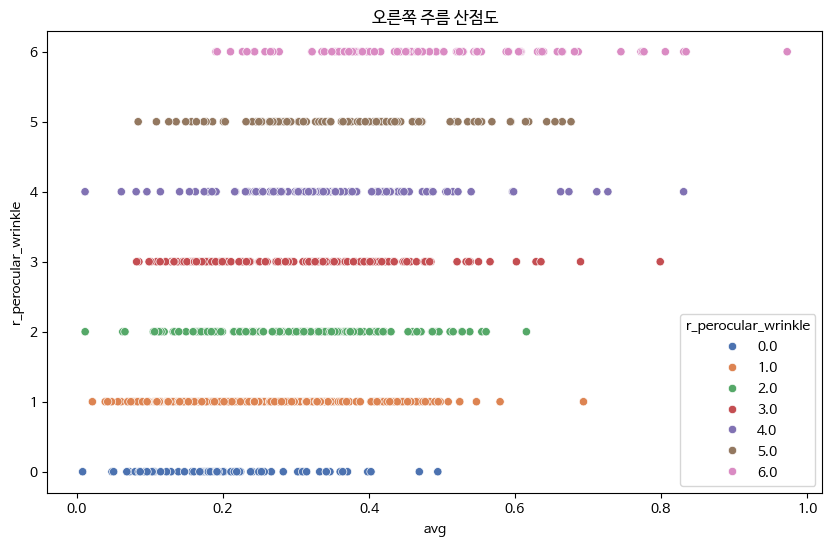

In [445]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = r_scaled, x='avg', y='r_perocular_wrinkle', hue='r_perocular_wrinkle', palette='deep')
plt.title('오른쪽 주름 산점도')
plt.show()

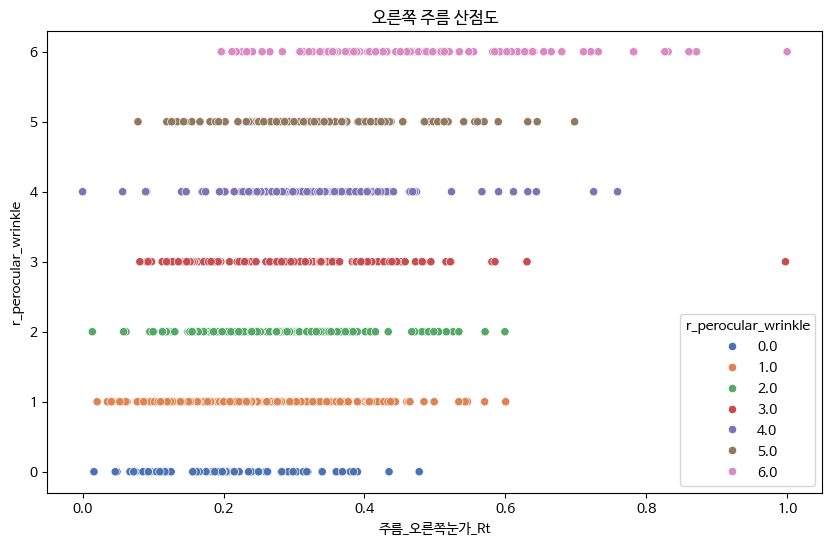

In [446]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = r_scaled, x='주름_오른쪽눈가_Rt', y='r_perocular_wrinkle', hue='r_perocular_wrinkle', palette='deep')
plt.title('오른쪽 주름 산점도')
plt.show()

In [447]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = ['주름_오른쪽눈가_Ra', '주름_오른쪽눈가_Rq', '주름_오른쪽눈가_Rmax',
            '주름_오른쪽눈가_R3z', '주름_오른쪽눈가_Rt',
            '주름_오른쪽눈가_Rz=Rtm', '주름_오른쪽눈가_Rp', '주름_오른쪽눈가_Rv']
x = r_perocular[features]

# # 데이터 정규화
# scaler = StandardScaler()
# x_scaled = scaler.fit_transform(x)

# PCA 적용
pca = PCA(n_components=1)
principal_components = pca.fit_transform(x)

pca.explained_variance_ratio_

array([0.97320162])

In [448]:
pca = PCA(n_components=1)  # 1개의 주성분으로 변환
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['pc1'])

In [449]:
principalDf

,pc1
0,-124.605930
1,-84.666886
2,-91.915710
3,-77.291852
4,-82.436226
...,...
960,-85.246645
961,-98.046444
962,-87.208542
963,-134.721693


In [450]:
# 결과
pca_components = pca.components_
print('printcipalComponents:\n', pca_components)
# ['주름_오른쪽눈가_Ra', '주름_오른쪽눈가_Rq', '주름_오른쪽눈가_Rmax', '주름_오른쪽눈가_R3z', '주름_오른쪽눈가_Rt', '주름_오른쪽눈가_Rz=Rtm', '주름_오른쪽눈가_Rp', '주름_오른쪽눈가_Rv']

# pc1
## '주름_오른쪽눈가_Rt''주름_오른쪽눈가_Rmax'

printcipalComponents:
 [[0.07267334 0.09081882 0.55369691 0.2111558  0.57410014 0.36572632
  0.22721114 0.34688884]]


In [451]:
r_pc = pd.concat([r_perocular[['r_perocular_wrinkle']], principalDf], axis = 1)
r_pc

,r_perocular_wrinkle,pc1
0,2.0,-124.605930
1,3.0,-84.666886
2,0.0,-91.915710
3,2.0,-77.291852
4,3.0,-82.436226
...,...,...
960,1.0,-85.246645
961,1.0,-98.046444
962,1.0,-87.208542
963,1.0,-134.721693


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


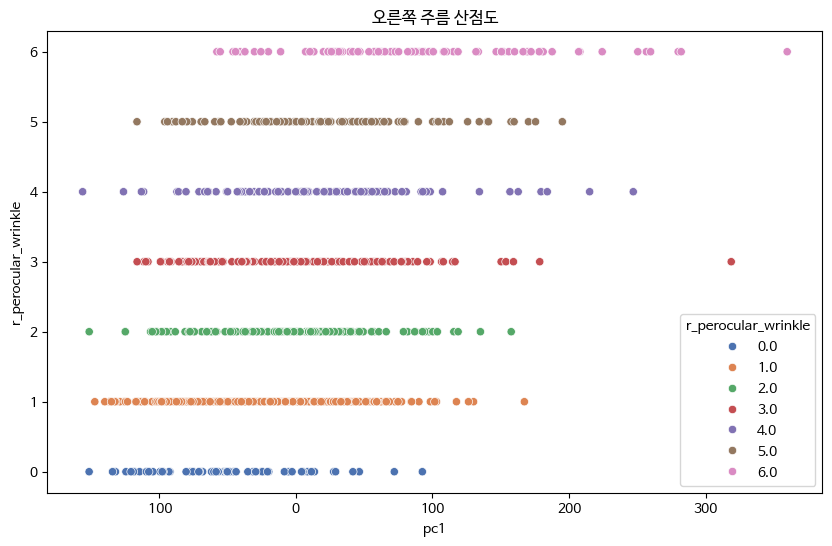

In [452]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = r_pc, x='pc1', y='r_perocular_wrinkle', hue='r_perocular_wrinkle', palette='deep')
plt.title('오른쪽 주름 산점도')
plt.show()

In [453]:
r_scaled.columns

Index(['r_perocular_wrinkle', '주름_오른쪽눈가_Ra', '주름_오른쪽눈가_Rq', '주름_오른쪽눈가_Rmax',
       '주름_오른쪽눈가_R3z', '주름_오른쪽눈가_Rt', '주름_오른쪽눈가_Rz=Rtm', '주름_오른쪽눈가_Rp',
       '주름_오른쪽눈가_Rv', 'avg'],
      dtype='object')

In [454]:
import scipy.stats as stats

# 분할표 생성
contingency_table = pd.crosstab(r_scaled['주름_오른쪽눈가_Ra'], r_scaled['r_perocular_wrinkle'])

# 카이제곱 검정
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)

print(f"카이제곱 통계량: {chi2}, p-value: {p}")
# 두 변수 간에 통계적으로 유의미한 연관성이 없다.

카이제곱 통계량: 5625.580114739756, p-value: 0.43910315746775974


In [455]:
# 분할표 생성
contingency_table = pd.crosstab(r_scaled['주름_오른쪽눈가_Rq'], r_scaled['r_perocular_wrinkle'])

# 카이제곱 검정
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)

print(f"카이제곱 통계량: {chi2}, p-value: {p}")
# 두 변수 간에 통계적으로 유의미한 연관성이 없다.

카이제곱 통계량: 5685.811785825941, p-value: 0.3519565626384134


In [456]:
# 분할표 생성
contingency_table = pd.crosstab(r_scaled['주름_오른쪽눈가_Rmax'], r_scaled['r_perocular_wrinkle'])

# 카이제곱 검정
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)

print(f"카이제곱 통계량: {chi2}, p-value: {p}")
# 두 변수 간에 통계적으로 유의미한 연관성이 없다.

카이제곱 통계량: 5581.364290826148, p-value: 0.4026189884761892


In [457]:
# 분할표 생성
contingency_table = pd.crosstab(r_scaled['주름_오른쪽눈가_R3z'], r_scaled['r_perocular_wrinkle'])

# 카이제곱 검정
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)

print(f"카이제곱 통계량: {chi2}, p-value: {p}")
# 두 변수 간에 통계적으로 유의미한 연관성이 없다.

카이제곱 통계량: 5723.034107520194, p-value: 0.4564405284017677


In [458]:
# 분할표 생성
contingency_table = pd.crosstab(r_scaled['주름_오른쪽눈가_Rt'], r_scaled['r_perocular_wrinkle'])

# 카이제곱 검정
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)

print(f"카이제곱 통계량: {chi2}, p-value: {p}")
# 두 변수 간에 통계적으로 유의미한 연관성이 없다.

카이제곱 통계량: 5620.2082561532025, p-value: 0.32897315197890903


In [459]:
# 분할표 생성
contingency_table = pd.crosstab(r_scaled['주름_오른쪽눈가_Rz=Rtm'], r_scaled['r_perocular_wrinkle'])

# 카이제곱 검정
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)

print(f"카이제곱 통계량: {chi2}, p-value: {p}")
# 두 변수 간에 통계적으로 유의미한 연관성이 없다.

카이제곱 통계량: 5553.53321535248, p-value: 0.5294929962668108


In [460]:
# 분할표 생성
contingency_table = pd.crosstab(r_scaled['주름_오른쪽눈가_Rp'], r_scaled['r_perocular_wrinkle'])

# 카이제곱 검정
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)

print(f"카이제곱 통계량: {chi2}, p-value: {p}")
# 두 변수 간에 통계적으로 유의미한 연관성이 없다.

카이제곱 통계량: 5688.603202271497, p-value: 0.4062939166343555


In [461]:
# 분할표 생성
contingency_table = pd.crosstab(r_scaled['주름_오른쪽눈가_Rv'], r_scaled['r_perocular_wrinkle'])

# 카이제곱 검정
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)

print(f"카이제곱 통계량: {chi2}, p-value: {p}")
# 두 변수 간에 통계적으로 유의미한 연관성이 없다.

카이제곱 통계량: 5733.065141238029, p-value: 0.4195364474211996


In [462]:
# 분할표 생성
contingency_table = pd.crosstab(r_scaled['avg'], r_scaled['r_perocular_wrinkle'])

# 카이제곱 검정
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)

print(f"카이제곱 통계량: {chi2}, p-value: {p}")
# 두 변수 간에 통계적으로 유의미한 연관성이 없다.

카이제곱 통계량: 5783.527325990909, p-value: 0.4548486575014572


사분위수 확인

In [463]:
r_scaled = pd.concat([r_scaled, principalDf], axis = 1)
r_scaled

,r_perocular_wrinkle,주름_오른쪽눈가_Ra,주름_오른쪽눈가_Rq,주름_오른쪽눈가_Rmax,주름_오른쪽눈가_R3z,주름_오른쪽눈가_Rt,주름_오른쪽눈가_Rz=Rtm,주름_오른쪽눈가_Rp,주름_오른쪽눈가_Rv,avg,pc1
0,2.0,0.060822,0.057068,0.063919,0.083567,0.061541,0.055771,0.054915,0.064264,0.062733,-124.605930
1,3.0,0.112712,0.108961,0.136807,0.135874,0.143481,0.129961,0.120050,0.153514,0.130170,-84.666886
2,0.0,0.141662,0.135158,0.118019,0.182358,0.120211,0.157145,0.172698,0.083797,0.138881,-91.915710
3,2.0,0.189979,0.178660,0.135124,0.204068,0.154445,0.183863,0.181699,0.132482,0.170040,-77.291852
4,3.0,0.164658,0.152420,0.137245,0.190892,0.143414,0.161827,0.221179,0.090387,0.157753,-82.436226
...,...,...,...,...,...,...,...,...,...,...,...
960,1.0,0.148269,0.142832,0.123541,0.195021,0.141167,0.162482,0.220250,0.087368,0.152616,-85.246645
961,1.0,0.129753,0.121244,0.107245,0.161132,0.110588,0.135437,0.154433,0.079970,0.124975,-98.046444
962,1.0,0.133581,0.125832,0.125494,0.161753,0.138820,0.145145,0.197126,0.098089,0.140730,-87.208542
963,1.0,0.041455,0.039328,0.041458,0.052062,0.040715,0.049391,0.018052,0.054240,0.042088,-134.721693


In [464]:
from sklearn.preprocessing import MinMaxScaler

# 사용할 feature 목록
features = ['pc1']

# 데이터프레임에서 해당 feature 선택
x = r_scaled[features]

# Min-Max 정규화
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

# 정규화된 데이터를 데이터프레임으로 변환
x_scaled_df = pd.DataFrame(x_scaled, columns=features)

# 결과 출력

r_scaled['pc1'] = x_scaled_df['pc1']
r_scaled

,r_perocular_wrinkle,주름_오른쪽눈가_Ra,주름_오른쪽눈가_Rq,주름_오른쪽눈가_Rmax,주름_오른쪽눈가_R3z,주름_오른쪽눈가_Rt,주름_오른쪽눈가_Rz=Rtm,주름_오른쪽눈가_Rp,주름_오른쪽눈가_Rv,avg,pc1
0,2.0,0.060822,0.057068,0.063919,0.083567,0.061541,0.055771,0.054915,0.064264,0.062733,0.060528
1,3.0,0.112712,0.108961,0.136807,0.135874,0.143481,0.129961,0.120050,0.153514,0.130170,0.138032
2,0.0,0.141662,0.135158,0.118019,0.182358,0.120211,0.157145,0.172698,0.083797,0.138881,0.123965
3,2.0,0.189979,0.178660,0.135124,0.204068,0.154445,0.183863,0.181699,0.132482,0.170040,0.152343
4,3.0,0.164658,0.152420,0.137245,0.190892,0.143414,0.161827,0.221179,0.090387,0.157753,0.142360
...,...,...,...,...,...,...,...,...,...,...,...
960,1.0,0.148269,0.142832,0.123541,0.195021,0.141167,0.162482,0.220250,0.087368,0.152616,0.136907
961,1.0,0.129753,0.121244,0.107245,0.161132,0.110588,0.135437,0.154433,0.079970,0.124975,0.112068
962,1.0,0.133581,0.125832,0.125494,0.161753,0.138820,0.145145,0.197126,0.098089,0.140730,0.133100
963,1.0,0.041455,0.039328,0.041458,0.052062,0.040715,0.049391,0.018052,0.054240,0.042088,0.040898


In [465]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = ['주름_오른쪽눈가_Ra', '주름_오른쪽눈가_Rq']
x = r_perocular[features]

# # 데이터 정규화
# scaler = StandardScaler()
# x_scaled = scaler.fit_transform(x)

# PCA 적용
pca = PCA(n_components=1)
principal_components = pca.fit_transform(x)

pca.explained_variance_ratio_

array([0.99953739])

In [466]:
pca = PCA(n_components=1)  # 1개의 주성분으로 변환
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['pc1_v2'])

In [467]:
principalDf

,pc1_v2
0,-14.638572
1,-11.631689
2,-10.052779
3,-7.425507
4,-8.925656
...,...
960,-9.631719
961,-10.814644
962,-10.565643
963,-15.702506


In [468]:
# 결과
pca_components = pca.components_
print('printcipalComponents:\n', pca_components)
# ['주름_오른쪽눈가_Rv']

# pc1
## '주름_오른쪽눈가_Rt''주름_오른쪽눈가_Rmax'

printcipalComponents:
 [[0.62749437 0.7786211 ]]


In [469]:
r_scaled = pd.concat([r_scaled, principalDf], axis = 1)

In [470]:
from sklearn.preprocessing import MinMaxScaler

# 사용할 feature 목록
features = ['pc1_v2']

# 데이터프레임에서 해당 feature 선택
x = r_scaled[features]

# Min-Max 정규화
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

# 정규화된 데이터를 데이터프레임으로 변환
x_scaled_df = pd.DataFrame(x_scaled, columns=features)

# 결과 출력

r_scaled['pc1_v2'] = x_scaled_df['pc1_v2']
r_scaled

,r_perocular_wrinkle,주름_오른쪽눈가_Ra,주름_오른쪽눈가_Rq,주름_오른쪽눈가_Rmax,주름_오른쪽눈가_R3z,주름_오른쪽눈가_Rt,주름_오른쪽눈가_Rz=Rtm,주름_오른쪽눈가_Rp,주름_오른쪽눈가_Rv,avg,pc1,pc1_v2
0,2.0,0.060822,0.057068,0.063919,0.083567,0.061541,0.055771,0.054915,0.064264,0.062733,0.060528,0.058501
1,3.0,0.112712,0.108961,0.136807,0.135874,0.143481,0.129961,0.120050,0.153514,0.130170,0.138032,0.110394
2,0.0,0.141662,0.135158,0.118019,0.182358,0.120211,0.157145,0.172698,0.083797,0.138881,0.123965,0.137642
3,2.0,0.189979,0.178660,0.135124,0.204068,0.154445,0.183863,0.181699,0.132482,0.170040,0.152343,0.182983
4,3.0,0.164658,0.152420,0.137245,0.190892,0.143414,0.161827,0.221179,0.090387,0.157753,0.142360,0.157094
...,...,...,...,...,...,...,...,...,...,...,...,...
960,1.0,0.148269,0.142832,0.123541,0.195021,0.141167,0.162482,0.220250,0.087368,0.152616,0.136907,0.144909
961,1.0,0.129753,0.121244,0.107245,0.161132,0.110588,0.135437,0.154433,0.079970,0.124975,0.112068,0.124494
962,1.0,0.133581,0.125832,0.125494,0.161753,0.138820,0.145145,0.197126,0.098089,0.140730,0.133100,0.128791
963,1.0,0.041455,0.039328,0.041458,0.052062,0.040715,0.049391,0.018052,0.054240,0.042088,0.040898,0.040140


In [471]:
r_scaled.describe()

,r_perocular_wrinkle,주름_오른쪽눈가_Ra,주름_오른쪽눈가_Rq,주름_오른쪽눈가_Rmax,주름_오른쪽눈가_R3z,주름_오른쪽눈가_Rt,주름_오른쪽눈가_Rz=Rtm,주름_오른쪽눈가_Rp,주름_오른쪽눈가_Rv,avg,pc1,pc1_v2
count,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000
mean,2.585492,0.320463,0.305364,0.287907,0.352539,0.302128,0.330836,0.333515,0.271902,0.313082,0.302332,0.311131
std,1.834489,0.154398,0.146858,0.135887,0.159364,0.140158,0.150636,0.149790,0.137704,0.143574,0.141071,0.149703
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007761,0.000000,0.000000
25%,1.000000,0.204781,0.195987,0.194484,0.235721,0.205176,0.220988,0.227511,0.175507,0.211011,0.204305,0.199173
50%,2.000000,0.302351,0.288339,0.277210,0.339923,0.290073,0.319627,0.324429,0.251252,0.303319,0.290957,0.292955
75%,4.000000,0.409618,0.391213,0.362159,0.443731,0.378156,0.420263,0.424092,0.346040,0.398215,0.382358,0.400002
max,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.972731,1.000000,1.000000


In [472]:
df0 = r_scaled[r_scaled.r_perocular_wrinkle == 0.0].describe()

In [473]:
df1 = r_scaled[r_scaled.r_perocular_wrinkle == 1.0].describe()

In [474]:
df2 = r_scaled[r_scaled.r_perocular_wrinkle == 2.0].describe()

In [475]:
df3 = r_scaled[r_scaled.r_perocular_wrinkle == 3.0].describe()

In [476]:
df4 = r_scaled[r_scaled.r_perocular_wrinkle == 4.0].describe()

In [477]:
df5 = r_scaled[r_scaled.r_perocular_wrinkle == 5.0].describe()

In [478]:
df6 = r_scaled[r_scaled.r_perocular_wrinkle == 6.0].describe()

In [479]:
pd.concat([df0.주름_오른쪽눈가_Ra, df1.주름_오른쪽눈가_Ra, df2.주름_오른쪽눈가_Ra, df3.주름_오른쪽눈가_Ra, df4.주름_오른쪽눈가_Ra, df5.주름_오른쪽눈가_Ra, df6.주름_오른쪽눈가_Ra], axis=1)

,주름_오른쪽눈가_Ra,주름_오른쪽눈가_Ra,주름_오른쪽눈가_Ra,주름_오른쪽눈가_Ra,주름_오른쪽눈가_Ra,주름_오른쪽눈가_Ra,주름_오른쪽눈가_Ra
count,68.000000,322.000000,140.000000,140.000000,100.000000,97.000000,98.000000
mean,0.207068,0.260568,0.307485,0.322910,0.370631,0.385809,0.495121
std,0.107189,0.115315,0.121876,0.142717,0.159082,0.150317,0.165672
min,0.000000,0.022117,0.010888,0.071370,0.024357,0.086597,0.183486
25%,0.130568,0.178198,0.218448,0.192588,0.269834,0.285309,0.379746
50%,0.192531,0.260413,0.316230,0.332988,0.355913,0.386310,0.479386
75%,0.267063,0.324205,0.373798,0.413637,0.459573,0.474608,0.595500
max,0.504806,0.767573,0.637366,0.723736,0.911617,0.740295,1.000000


In [480]:
pd.concat([df0.주름_오른쪽눈가_Rq, df1.주름_오른쪽눈가_Rq, df2.주름_오른쪽눈가_Rq, df3.주름_오른쪽눈가_Rq, df4.주름_오른쪽눈가_Rq, df5.주름_오른쪽눈가_Rq, df6.주름_오른쪽눈가_Rq], axis=1)

,주름_오른쪽눈가_Rq,주름_오른쪽눈가_Rq,주름_오른쪽눈가_Rq,주름_오른쪽눈가_Rq,주름_오른쪽눈가_Rq,주름_오른쪽눈가_Rq,주름_오른쪽눈가_Rq
count,68.000000,322.000000,140.000000,140.000000,100.000000,97.000000,98.000000
mean,0.198535,0.248770,0.293321,0.307067,0.352357,0.365768,0.472475
std,0.102385,0.109108,0.115997,0.136591,0.150135,0.141887,0.160532
min,0.000000,0.018957,0.007566,0.071242,0.016631,0.077569,0.173964
25%,0.126614,0.170719,0.210265,0.185742,0.259468,0.269033,0.363695
50%,0.182356,0.250098,0.300709,0.313492,0.344232,0.363820,0.454672
75%,0.258234,0.308926,0.356885,0.396153,0.436340,0.448715,0.563861
max,0.477042,0.721618,0.601265,0.693813,0.862864,0.708705,1.000000


In [481]:
# x
pd.concat([df0.주름_오른쪽눈가_Rmax, df1.주름_오른쪽눈가_Rmax, df2.주름_오른쪽눈가_Rmax, df3.주름_오른쪽눈가_Rmax, df4.주름_오른쪽눈가_Rmax, df5.주름_오른쪽눈가_Rmax, df6.주름_오른쪽눈가_Rmax], axis=1)

,주름_오른쪽눈가_Rmax,주름_오른쪽눈가_Rmax,주름_오른쪽눈가_Rmax,주름_오른쪽눈가_Rmax,주름_오른쪽눈가_Rmax,주름_오른쪽눈가_Rmax,주름_오른쪽눈가_Rmax
count,68.000000,322.000000,140.000000,140.000000,100.000000,97.000000,98.000000
mean,0.194986,0.240022,0.276949,0.282522,0.322894,0.334447,0.451301
std,0.097836,0.098821,0.108444,0.131671,0.125768,0.126113,0.163460
min,0.006953,0.019704,0.010663,0.076353,0.000000,0.081286,0.185123
25%,0.117018,0.166277,0.206638,0.169753,0.248195,0.248793,0.342269
50%,0.188221,0.242210,0.271150,0.279971,0.324146,0.324180,0.414667
75%,0.254172,0.296730,0.342067,0.356865,0.382967,0.405055,0.536047
max,0.455425,0.570306,0.592528,0.949765,0.724817,0.686702,1.000000


In [482]:
pd.concat([df0.주름_오른쪽눈가_R3z, df1.주름_오른쪽눈가_R3z, df2.주름_오른쪽눈가_R3z, df3.주름_오른쪽눈가_R3z, df4.주름_오른쪽눈가_R3z, df5.주름_오른쪽눈가_R3z, df6.주름_오른쪽눈가_R3z], axis=1)

,주름_오른쪽눈가_R3z,주름_오른쪽눈가_R3z,주름_오른쪽눈가_R3z,주름_오른쪽눈가_R3z,주름_오른쪽눈가_R3z,주름_오른쪽눈가_R3z,주름_오른쪽눈가_R3z
count,68.000000,322.000000,140.000000,140.000000,100.000000,97.000000,98.000000
mean,0.239243,0.295437,0.342580,0.359603,0.403181,0.409595,0.514760
std,0.118678,0.126244,0.131116,0.153901,0.170536,0.154821,0.159449
min,0.000000,0.025060,0.024085,0.082818,0.041320,0.099176,0.207438
25%,0.151940,0.205999,0.244546,0.226339,0.295025,0.306890,0.414726
50%,0.223629,0.295040,0.347644,0.361642,0.386954,0.419449,0.497807
75%,0.305173,0.361672,0.418673,0.453851,0.502365,0.507351,0.614966
max,0.556348,0.900863,0.678249,0.829418,1.000000,0.782215,0.936438


In [483]:
pd.concat([df0.주름_오른쪽눈가_Rt, df1.주름_오른쪽눈가_Rt, df2.주름_오른쪽눈가_Rt, df3.주름_오른쪽눈가_Rt, df4.주름_오른쪽눈가_Rt, df5.주름_오른쪽눈가_Rt, df6.주름_오른쪽눈가_Rt], axis=1)

,주름_오른쪽눈가_Rt,주름_오른쪽눈가_Rt,주름_오른쪽눈가_Rt,주름_오른쪽눈가_Rt,주름_오른쪽눈가_Rt,주름_오른쪽눈가_Rt,주름_오른쪽눈가_Rt
count,68.000000,322.000000,140.000000,140.000000,100.000000,97.000000,98.000000
mean,0.207396,0.252436,0.291913,0.298066,0.337478,0.350491,0.467586
std,0.100888,0.103150,0.112598,0.137356,0.131509,0.131094,0.164851
min,0.016104,0.020641,0.013784,0.081249,0.000000,0.078601,0.196726
25%,0.124285,0.176013,0.216182,0.180523,0.260642,0.257784,0.355498
50%,0.198671,0.254532,0.289067,0.297215,0.336411,0.346236,0.432156
75%,0.267717,0.312488,0.353151,0.386681,0.404276,0.424863,0.553307
max,0.477740,0.600459,0.599419,0.997586,0.759256,0.698299,1.000000


In [484]:
pd.concat([df0["주름_오른쪽눈가_Rz=Rtm"], df1["주름_오른쪽눈가_Rz=Rtm"], df2["주름_오른쪽눈가_Rz=Rtm"], df3["주름_오른쪽눈가_Rz=Rtm"], df4["주름_오른쪽눈가_Rz=Rtm"], df5["주름_오른쪽눈가_Rz=Rtm"], df6["주름_오른쪽눈가_Rz=Rtm"]], axis=1)

,주름_오른쪽눈가_Rz=Rtm,주름_오른쪽눈가_Rz=Rtm,주름_오른쪽눈가_Rz=Rtm,주름_오른쪽눈가_Rz=Rtm,주름_오른쪽눈가_Rz=Rtm,주름_오른쪽눈가_Rz=Rtm,주름_오른쪽눈가_Rz=Rtm
count,68.000000,322.000000,140.000000,140.000000,100.000000,97.000000,98.000000
mean,0.227114,0.279115,0.322092,0.330603,0.373372,0.383357,0.490177
std,0.113452,0.117003,0.125507,0.145079,0.155898,0.144820,0.161894
min,0.009353,0.016543,0.000000,0.078023,0.004832,0.077263,0.181749
25%,0.152497,0.196496,0.237673,0.195783,0.271778,0.294385,0.383370
50%,0.209341,0.280515,0.328226,0.340569,0.359376,0.387420,0.475379
75%,0.287880,0.352691,0.392371,0.430942,0.454950,0.471856,0.598761
max,0.557180,0.775650,0.641839,0.767994,0.902083,0.726497,1.000000


In [485]:
pd.concat([df0.주름_오른쪽눈가_Rp, df1.주름_오른쪽눈가_Rp, df2.주름_오른쪽눈가_Rp, df3.주름_오른쪽눈가_Rp, df4.주름_오른쪽눈가_Rp, df5.주름_오른쪽눈가_Rp, df6.주름_오른쪽눈가_Rp], axis=1)

,주름_오른쪽눈가_Rp,주름_오른쪽눈가_Rp,주름_오른쪽눈가_Rp,주름_오른쪽눈가_Rp,주름_오른쪽눈가_Rp,주름_오른쪽눈가_Rp,주름_오른쪽눈가_Rp
count,68.000000,322.000000,140.000000,140.000000,100.000000,97.000000,98.000000
mean,0.244555,0.292055,0.332365,0.328497,0.359903,0.368866,0.478366
std,0.121878,0.123785,0.132184,0.152921,0.149762,0.135028,0.167555
min,0.008472,0.018052,0.000000,0.091625,0.001534,0.099748,0.172409
25%,0.148565,0.214871,0.243563,0.206361,0.256243,0.284558,0.362079
50%,0.243343,0.291956,0.330587,0.325725,0.358893,0.360363,0.453714
75%,0.323794,0.362247,0.417305,0.418062,0.449463,0.455330,0.579185
max,0.585258,0.692481,0.708931,1.000000,0.749587,0.699214,0.948349


In [486]:
pd.concat([df0.주름_오른쪽눈가_Rv, df1.주름_오른쪽눈가_Rv, df2.주름_오른쪽눈가_Rv, df3.주름_오른쪽눈가_Rv, df4.주름_오른쪽눈가_Rv, df5.주름_오른쪽눈가_Rv, df6.주름_오른쪽눈가_Rv], axis=1)

,주름_오른쪽눈가_Rv,주름_오른쪽눈가_Rv,주름_오른쪽눈가_Rv,주름_오른쪽눈가_Rv,주름_오른쪽눈가_Rv,주름_오른쪽눈가_Rv,주름_오른쪽눈가_Rv
count,68.000000,322.000000,140.000000,140.000000,100.000000,97.000000,98.000000
mean,0.177211,0.218986,0.256428,0.268593,0.311484,0.326523,0.443847
std,0.093801,0.096622,0.105802,0.129981,0.124832,0.130124,0.167792
min,0.021202,0.013234,0.022812,0.070578,0.000000,0.051880,0.184830
25%,0.115390,0.152471,0.175567,0.165968,0.234577,0.230693,0.334745
50%,0.162265,0.214469,0.248793,0.255690,0.312510,0.310652,0.408385
75%,0.231193,0.275341,0.321139,0.346199,0.372083,0.409767,0.511244
max,0.404611,0.634433,0.582346,0.958702,0.737066,0.703316,1.000000


In [487]:
pd.concat([df0.avg, df1.avg, df2.avg, df3.avg, df4.avg, df5.avg, df6.avg], axis=1)

,avg,avg,avg,avg,avg,avg,avg
count,68.000000,322.000000,140.000000,140.000000,100.000000,97.000000,98.000000
mean,0.212014,0.260923,0.302892,0.312233,0.353913,0.365607,0.476704
std,0.104345,0.108064,0.115866,0.137851,0.142576,0.136163,0.158941
min,0.007761,0.021130,0.011225,0.081747,0.011084,0.083819,0.190320
25%,0.136364,0.183602,0.223077,0.188689,0.268770,0.272068,0.366817
50%,0.200865,0.265395,0.307580,0.317673,0.344806,0.364458,0.455575
75%,0.270269,0.323355,0.372159,0.397081,0.429517,0.435410,0.590035
max,0.494227,0.693738,0.615551,0.798838,0.830911,0.676678,0.972731


In [488]:
pd.concat([df0.pc1, df1.pc1, df2.pc1, df3.pc1, df4.pc1, df5.pc1, df6.pc1], axis=1)

,pc1,pc1,pc1,pc1,pc1,pc1,pc1
count,68.000000,322.000000,140.000000,140.000000,100.000000,97.000000,98.000000
mean,0.205199,0.251946,0.291727,0.298875,0.339798,0.351906,0.468073
std,0.102277,0.104224,0.113487,0.136750,0.134519,0.132245,0.163392
min,0.009218,0.017268,0.009317,0.077316,0.000000,0.077136,0.190522
25%,0.123603,0.174218,0.216928,0.179878,0.259561,0.260444,0.355855
50%,0.196163,0.251377,0.289910,0.299459,0.337995,0.345434,0.439236
75%,0.262868,0.309992,0.356399,0.381577,0.410913,0.423512,0.560770
max,0.482181,0.626989,0.608283,0.920579,0.781542,0.680873,1.000000


In [489]:
pd.concat([df0.pc1_v2, df1.pc1_v2, df2.pc1_v2, df3.pc1_v2, df4.pc1_v2, df5.pc1_v2, df6.pc1_v2], axis=1)

,pc1_v2,pc1_v2,pc1_v2,pc1_v2,pc1_v2,pc1_v2,pc1_v2
count,68.000000,322.000000,140.000000,140.000000,100.000000,97.000000,98.000000
mean,0.201794,0.253276,0.298731,0.313118,0.359336,0.373422,0.481123
std,0.104201,0.111445,0.118202,0.138879,0.153521,0.145071,0.162445
min,0.000000,0.020164,0.008835,0.071291,0.019582,0.081016,0.177601
25%,0.128124,0.174865,0.213518,0.189151,0.263901,0.275704,0.371517
50%,0.185811,0.254018,0.306637,0.322118,0.348694,0.374337,0.463497
75%,0.261606,0.315202,0.363899,0.403551,0.445337,0.461907,0.575930
max,0.487646,0.739169,0.615053,0.705241,0.881483,0.720770,1.000000


In [491]:
r_scaled.r_perocular_wrinkle.value_counts()

,count
r_perocular_wrinkle,
1.0,322
2.0,140
3.0,140
4.0,100
6.0,98
5.0,97
0.0,68


왼쪽 눈가주름

In [75]:
label_wrinkle_l_perocular = label_wrinkle[['ID','location', 'l_perocular_wrinkle']]

In [76]:
measurement_wrinkle_l_perocular = measurement_wrinkle[['ID','주름_왼쪽눈가_Ra', '주름_왼쪽눈가_Rq', '주름_왼쪽눈가_Rmax',
                                                       '주름_왼쪽눈가_R3z', '주름_왼쪽눈가_Rt',
                                                       '주름_왼쪽눈가_Rz=Rtm', '주름_왼쪽눈가_Rp', '주름_왼쪽눈가_Rv']]

In [78]:
l_perocular = pd.merge(label_wrinkle_l_perocular, measurement_wrinkle_l_perocular, on='ID')
l_perocular = l_perocular[l_perocular.location == 'F']
l_perocular.reset_index(drop=True, inplace=True)
l_perocular

,ID,location,l_perocular_wrinkle,주름_왼쪽눈가_Ra,주름_왼쪽눈가_Rq,주름_왼쪽눈가_Rmax,주름_왼쪽눈가_R3z,주름_왼쪽눈가_Rt,주름_왼쪽눈가_Rz=Rtm,주름_왼쪽눈가_Rp,주름_왼쪽눈가_Rv
0,1,F,3.0,14.581,18.517,121.230,48.491,127.28,86.372,58.520,68.764
1,2,F,3.0,15.440,19.504,122.920,49.631,127.85,89.604,58.363,69.486
2,3,F,0.0,14.234,17.888,106.800,46.069,112.22,83.785,52.243,59.979
3,4,F,2.0,17.478,21.618,133.210,54.118,139.96,93.392,73.288,66.673
4,6,F,1.0,15.936,20.052,137.100,51.184,142.55,91.870,68.735,73.816
...,...,...,...,...,...,...,...,...,...,...,...
960,1096,F,1.0,18.550,23.304,133.660,59.315,140.89,105.080,69.008,71.882
961,1097,F,1.0,13.630,16.948,98.893,44.723,106.36,78.948,51.545,54.816
962,1098,F,1.0,14.230,18.011,109.180,47.786,116.98,83.307,54.817,62.164
963,1099,F,1.0,11.690,15.023,95.954,35.077,106.16,72.174,41.752,64.410


In [79]:
l_perocular.describe()

,ID,l_perocular_wrinkle,주름_왼쪽눈가_Ra,주름_왼쪽눈가_Rq,주름_왼쪽눈가_Rmax,주름_왼쪽눈가_R3z,주름_왼쪽눈가_Rt,주름_왼쪽눈가_Rz=Rtm,주름_왼쪽눈가_Rp,주름_왼쪽눈가_Rv
count,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000
mean,553.368912,2.586528,21.864304,27.464459,165.176699,69.641542,174.215862,122.857962,79.260788,94.955047
std,317.429021,1.841214,5.767411,7.143224,42.259080,17.391705,43.586194,28.917537,18.506173,26.951597
min,1.000000,0.000000,9.987700,12.643000,81.696000,32.710000,85.260000,60.666000,39.633000,41.921000
25%,281.000000,1.000000,17.600000,22.101000,136.350000,57.029000,143.750000,101.460000,66.329000,76.158000
50%,559.000000,2.000000,20.990000,26.504000,159.110000,67.273000,168.750000,119.530000,76.935000,91.545000
75%,826.000000,4.000000,25.030000,31.545000,188.390000,79.818000,198.110000,140.150000,90.216000,109.480000
max,1100.000000,6.000000,46.100000,58.076000,434.030000,157.100000,454.930000,241.670000,201.020000,253.920000


In [80]:
l_perocular.l_perocular_wrinkle.value_counts()

,count
l_perocular_wrinkle,
1.0,321
3.0,144
2.0,143
6.0,101
5.0,99
4.0,89
0.0,68


In [81]:
l_perocular.columns

Index(['ID', 'location', 'l_perocular_wrinkle', '주름_왼쪽눈가_Ra', '주름_왼쪽눈가_Rq',
       '주름_왼쪽눈가_Rmax', '주름_왼쪽눈가_R3z', '주름_왼쪽눈가_Rt', '주름_왼쪽눈가_Rz=Rtm',
       '주름_왼쪽눈가_Rp', '주름_왼쪽눈가_Rv'],
      dtype='object')

In [83]:
from sklearn.preprocessing import MinMaxScaler

# 사용할 feature 목록
features = ['주름_왼쪽눈가_Ra', '주름_왼쪽눈가_Rq',
           '주름_왼쪽눈가_Rmax', '주름_왼쪽눈가_R3z', '주름_왼쪽눈가_Rt', '주름_왼쪽눈가_Rz=Rtm',
           '주름_왼쪽눈가_Rp', '주름_왼쪽눈가_Rv']

# 데이터프레임에서 해당 feature 선택
x = l_perocular[features]

# Min-Max 정규화
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

# 정규화된 데이터를 데이터프레임으로 변환
x_scaled_df = pd.DataFrame(x_scaled, columns=features)

# 결과 출력
x_scaled_df


,주름_왼쪽눈가_Ra,주름_왼쪽눈가_Rq,주름_왼쪽눈가_Rmax,주름_왼쪽눈가_R3z,주름_왼쪽눈가_Rt,주름_왼쪽눈가_Rz=Rtm,주름_왼쪽눈가_Rp,주름_왼쪽눈가_Rv
0,0.127195,0.129289,0.112206,0.126867,0.113669,0.142019,0.117029,0.126619
1,0.150982,0.151014,0.117003,0.136032,0.115211,0.159875,0.116056,0.130024
2,0.117586,0.115445,0.071251,0.107396,0.072930,0.127726,0.078135,0.085180
3,0.207417,0.197544,0.146208,0.172104,0.147970,0.180803,0.208536,0.116755
4,0.164717,0.163075,0.157249,0.148517,0.154976,0.172394,0.180324,0.150449
...,...,...,...,...,...,...,...,...
960,0.237102,0.234653,0.147485,0.213884,0.150486,0.245376,0.182016,0.141326
961,0.100860,0.094755,0.048809,0.096575,0.057078,0.101003,0.073810,0.060826
962,0.117475,0.118152,0.078006,0.121199,0.085806,0.125086,0.094084,0.095486
963,0.047139,0.052385,0.040467,0.019029,0.056537,0.063579,0.013130,0.106081


In [84]:
x_scaled_df.describe()

,주름_왼쪽눈가_Ra,주름_왼쪽눈가_Rq,주름_왼쪽눈가_Rmax,주름_왼쪽눈가_R3z,주름_왼쪽눈가_Rt,주름_왼쪽눈가_Rz=Rtm,주름_왼쪽눈가_Rp,주름_왼쪽눈가_Rv
count,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000
mean,0.328880,0.326227,0.236936,0.296901,0.240636,0.343594,0.245545,0.250162
std,0.159708,0.157225,0.119940,0.139816,0.117906,0.159762,0.114670,0.127131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.210795,0.208175,0.155120,0.195506,0.158222,0.225376,0.165416,0.161496
50%,0.304669,0.305087,0.219718,0.277860,0.225850,0.325208,0.231134,0.234077
75%,0.416542,0.416041,0.302821,0.378712,0.305272,0.439128,0.313427,0.318676
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
l_scaled = pd.concat([l_perocular[['l_perocular_wrinkle']], x_scaled_df], axis = 1)
l_scaled

,l_perocular_wrinkle,주름_왼쪽눈가_Ra,주름_왼쪽눈가_Rq,주름_왼쪽눈가_Rmax,주름_왼쪽눈가_R3z,주름_왼쪽눈가_Rt,주름_왼쪽눈가_Rz=Rtm,주름_왼쪽눈가_Rp,주름_왼쪽눈가_Rv
0,3.0,0.127195,0.129289,0.112206,0.126867,0.113669,0.142019,0.117029,0.126619
1,3.0,0.150982,0.151014,0.117003,0.136032,0.115211,0.159875,0.116056,0.130024
2,0.0,0.117586,0.115445,0.071251,0.107396,0.072930,0.127726,0.078135,0.085180
3,2.0,0.207417,0.197544,0.146208,0.172104,0.147970,0.180803,0.208536,0.116755
4,1.0,0.164717,0.163075,0.157249,0.148517,0.154976,0.172394,0.180324,0.150449
...,...,...,...,...,...,...,...,...,...
960,1.0,0.237102,0.234653,0.147485,0.213884,0.150486,0.245376,0.182016,0.141326
961,1.0,0.100860,0.094755,0.048809,0.096575,0.057078,0.101003,0.073810,0.060826
962,1.0,0.117475,0.118152,0.078006,0.121199,0.085806,0.125086,0.094084,0.095486
963,1.0,0.047139,0.052385,0.040467,0.019029,0.056537,0.063579,0.013130,0.106081


In [87]:
# 각 행의 평균
l_scaled['avg'] = l_scaled[['주름_왼쪽눈가_Ra', '주름_왼쪽눈가_Rq',
                            '주름_왼쪽눈가_Rmax', '주름_왼쪽눈가_R3z', '주름_왼쪽눈가_Rt', '주름_왼쪽눈가_Rz=Rtm',
                            '주름_왼쪽눈가_Rp', '주름_왼쪽눈가_Rv']].mean(axis=1)

l_scaled.head()

,l_perocular_wrinkle,주름_왼쪽눈가_Ra,주름_왼쪽눈가_Rq,주름_왼쪽눈가_Rmax,주름_왼쪽눈가_R3z,주름_왼쪽눈가_Rt,주름_왼쪽눈가_Rz=Rtm,주름_왼쪽눈가_Rp,주름_왼쪽눈가_Rv,avg
0,3.0,0.127195,0.129289,0.112206,0.126867,0.113669,0.142019,0.117029,0.126619,0.124362
1,3.0,0.150982,0.151014,0.117003,0.136032,0.115211,0.159875,0.116056,0.130024,0.134525
2,0.0,0.117586,0.115445,0.071251,0.107396,0.072930,0.127726,0.078135,0.085180,0.096956
3,2.0,0.207417,0.197544,0.146208,0.172104,0.147970,0.180803,0.208536,0.116755,0.172167
4,1.0,0.164717,0.163075,0.157249,0.148517,0.154976,0.172394,0.180324,0.150449,0.161463


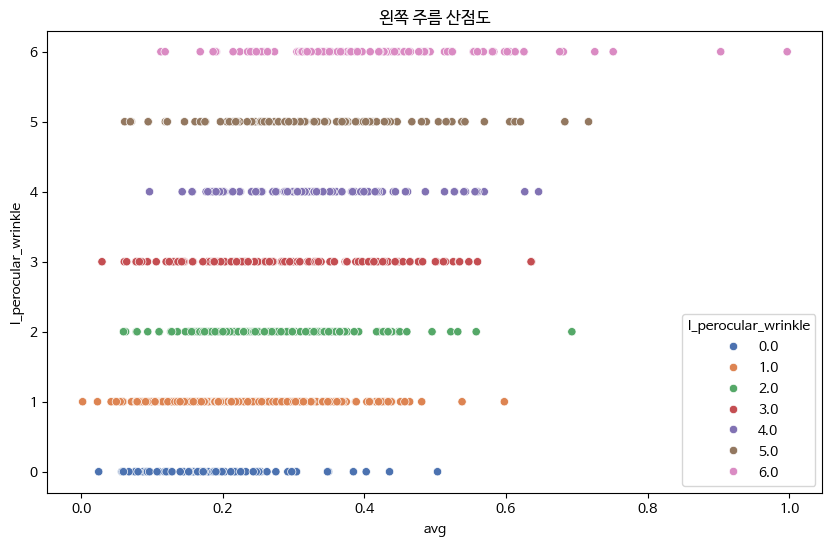

In [88]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = l_scaled, x='avg', y='l_perocular_wrinkle', hue='l_perocular_wrinkle', palette='deep')
plt.title('왼쪽 주름 산점도')
plt.show()

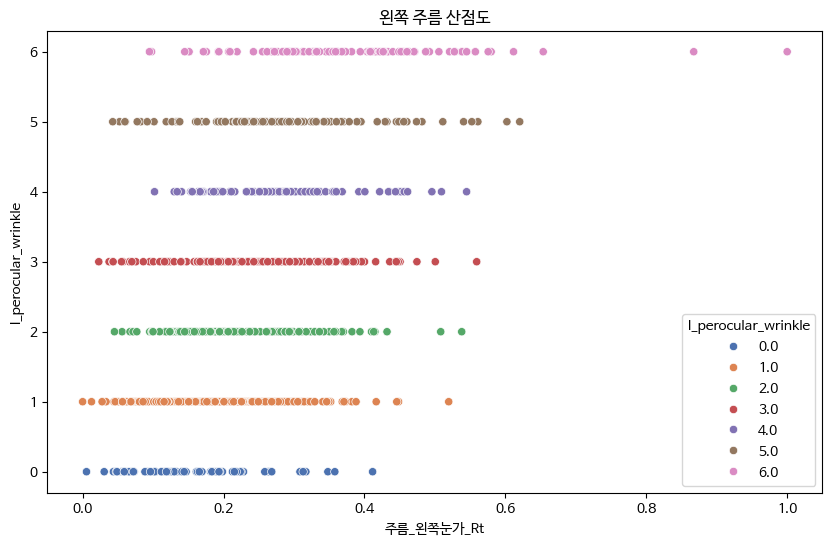

In [89]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = l_scaled, x='주름_왼쪽눈가_Rt', y='l_perocular_wrinkle', hue='l_perocular_wrinkle', palette='deep')
plt.title('왼쪽 주름 산점도')
plt.show()

In [92]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = ['주름_왼쪽눈가_Ra', '주름_왼쪽눈가_Rq',
            '주름_왼쪽눈가_Rmax', '주름_왼쪽눈가_R3z', '주름_왼쪽눈가_Rt', '주름_왼쪽눈가_Rz=Rtm',
            '주름_왼쪽눈가_Rp', '주름_왼쪽눈가_Rv']
x = l_perocular[features]

# # 데이터 정규화
# scaler = StandardScaler()
# x_scaled = scaler.fit_transform(x)

# PCA 적용
pca = PCA(n_components=1)
principal_components = pca.fit_transform(x)

pca.explained_variance_ratio_

array([0.97576006])

In [94]:
pca = PCA(n_components=1)  # 1개의 주성분으로 변환
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['pc1'])

In [95]:
principalDf

,pc1
0,-84.313872
1,-81.234201
2,-106.882240
3,-63.492236
4,-59.917798
...,...
960,-56.162047
961,-118.748020
962,-101.311736
963,-124.374917


In [97]:
# 결과
pca_components = pca.components_
print('printcipalComponents:\n', pca_components)
# ['주름_왼쪽눈가_Ra', '주름_왼쪽눈가_Rq','주름_왼쪽눈가_Rmax', '주름_왼쪽눈가_R3z', '주름_왼쪽눈가_Rt', '주름_왼쪽눈가_Rz=Rtm','주름_왼쪽눈가_Rp', '주름_왼쪽눈가_Rv']

# pc1
## '주름_왼쪽눈가_Rt''주름_왼쪽눈가_Rmax'

printcipalComponents:
 [[0.07387577 0.09195698 0.55207803 0.21978486 0.56993543 0.37274242
  0.22659317 0.34334092]]


In [98]:
l_pc = pd.concat([l_perocular[['l_perocular_wrinkle']], principalDf], axis = 1)
l_pc

,l_perocular_wrinkle,pc1
0,3.0,-84.313872
1,3.0,-81.234201
2,0.0,-106.882240
3,2.0,-63.492236
4,1.0,-59.917798
...,...,...
960,1.0,-56.162047
961,1.0,-118.748020
962,1.0,-101.311736
963,1.0,-124.374917


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


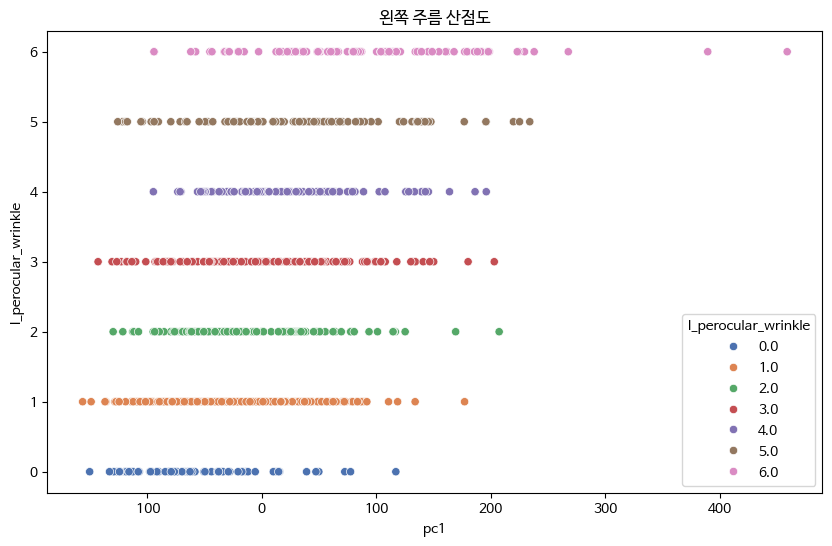

In [99]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = l_pc, x='pc1', y='l_perocular_wrinkle', hue='l_perocular_wrinkle', palette='deep')
plt.title('왼쪽 주름 산점도')
plt.show()

In [102]:
l_scaled.columns

Index(['l_perocular_wrinkle', '주름_왼쪽눈가_Ra', '주름_왼쪽눈가_Rq', '주름_왼쪽눈가_Rmax',
       '주름_왼쪽눈가_R3z', '주름_왼쪽눈가_Rt', '주름_왼쪽눈가_Rz=Rtm', '주름_왼쪽눈가_Rp',
       '주름_왼쪽눈가_Rv', 'avg'],
      dtype='object')

In [103]:
import scipy.stats as stats

# 분할표 생성
contingency_table = pd.crosstab(l_scaled['주름_왼쪽눈가_Ra'], l_scaled['l_perocular_wrinkle'])

# 카이제곱 검정
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)

print(f"카이제곱 통계량: {chi2}, p-value: {p}")
# 두 변수 간에 통계적으로 유의미한 연관성이 없다.

카이제곱 통계량: 5181.06152941244, p-value: 0.2279052046639733


In [104]:
# 분할표 생성
contingency_table = pd.crosstab(l_scaled['주름_왼쪽눈가_Rq'], l_scaled['l_perocular_wrinkle'])

# 카이제곱 검정
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)

print(f"카이제곱 통계량: {chi2}, p-value: {p}")
# 두 변수 간에 통계적으로 유의미한 연관성이 없다.

카이제곱 통계량: 5695.553259390087, p-value: 0.42482506442996093


In [105]:
# 분할표 생성
contingency_table = pd.crosstab(l_scaled['주름_왼쪽눈가_Rmax'], l_scaled['l_perocular_wrinkle'])

# 카이제곱 검정
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)

print(f"카이제곱 통계량: {chi2}, p-value: {p}")
# 두 변수 간에 통계적으로 유의미한 연관성이 없다.

카이제곱 통계량: 5655.388020683682, p-value: 0.3958855023702725


In [106]:
# 분할표 생성
contingency_table = pd.crosstab(l_scaled['주름_왼쪽눈가_R3z'], l_scaled['l_perocular_wrinkle'])

# 카이제곱 검정
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)

print(f"카이제곱 통계량: {chi2}, p-value: {p}")
# 두 변수 간에 통계적으로 유의미한 연관성이 없다.

카이제곱 통계량: 5722.263303103551, p-value: 0.5263409941733664


In [107]:
# 분할표 생성
contingency_table = pd.crosstab(l_scaled['주름_왼쪽눈가_Rt'], l_scaled['l_perocular_wrinkle'])

# 카이제곱 검정
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)

print(f"카이제곱 통계량: {chi2}, p-value: {p}")
# 두 변수 간에 통계적으로 유의미한 연관성이 없다.

카이제곱 통계량: 5649.535150833581, p-value: 0.4393984805334618


In [108]:
# 분할표 생성
contingency_table = pd.crosstab(l_scaled['주름_왼쪽눈가_Rz=Rtm'], l_scaled['l_perocular_wrinkle'])

# 카이제곱 검정
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)

print(f"카이제곱 통계량: {chi2}, p-value: {p}")
# 두 변수 간에 통계적으로 유의미한 연관성이 없다.

카이제곱 통계량: 5662.281019573518, p-value: 0.30912477027658464


In [109]:
# 분할표 생성
contingency_table = pd.crosstab(l_scaled['주름_왼쪽눈가_Rp'], l_scaled['l_perocular_wrinkle'])

# 카이제곱 검정
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)

print(f"카이제곱 통계량: {chi2}, p-value: {p}")
# 두 변수 간에 통계적으로 유의미한 연관성이 없다.

카이제곱 통계량: 5715.140636963852, p-value: 0.4857944455664946


In [110]:
# 분할표 생성
contingency_table = pd.crosstab(l_scaled['주름_왼쪽눈가_Rv'], l_scaled['l_perocular_wrinkle'])

# 카이제곱 검정
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)

print(f"카이제곱 통계량: {chi2}, p-value: {p}")
# 두 변수 간에 통계적으로 유의미한 연관성이 없다.

카이제곱 통계량: 5659.170575624448, p-value: 0.5603483945815456


In [111]:
# 분할표 생성
contingency_table = pd.crosstab(l_scaled['avg'], l_scaled['l_perocular_wrinkle'])

# 카이제곱 검정
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)

print(f"카이제곱 통계량: {chi2}, p-value: {p}")
# 두 변수 간에 통계적으로 유의미한 연관성이 없다.

카이제곱 통계량: 5790.0, p-value: 0.4752956554878006


다른 부위 주름 등급

In [112]:
label_wrinkle = label[['ID', 'location', 'r_perocular_wrinkle', 'l_perocular_wrinkle', 'glabellus_wrinkle', 'forehead_wrinkle']]
measurement_wrinkle = measurement[['ID', '주름_왼쪽눈가_Ra', '주름_왼쪽눈가_Rq', '주름_왼쪽눈가_Rmax', '주름_왼쪽눈가_R3z', '주름_왼쪽눈가_Rt',
                                    '주름_왼쪽눈가_Rz=Rtm', '주름_왼쪽눈가_Rp', '주름_왼쪽눈가_Rv', '주름_오른쪽눈가_Ra',
                                    '주름_오른쪽눈가_Rq', '주름_오른쪽눈가_Rmax', '주름_오른쪽눈가_R3z', '주름_오른쪽눈가_Rt',
                                    '주름_오른쪽눈가_Rz=Rtm', '주름_오른쪽눈가_Rp', '주름_오른쪽눈가_Rv']]

In [114]:
all = pd.merge(label_wrinkle, measurement_wrinkle, on = 'ID')

In [116]:
all.columns

Index(['ID', 'location', 'r_perocular_wrinkle', 'l_perocular_wrinkle',
       'glabellus_wrinkle', 'forehead_wrinkle', '주름_왼쪽눈가_Ra', '주름_왼쪽눈가_Rq',
       '주름_왼쪽눈가_Rmax', '주름_왼쪽눈가_R3z', '주름_왼쪽눈가_Rt', '주름_왼쪽눈가_Rz=Rtm',
       '주름_왼쪽눈가_Rp', '주름_왼쪽눈가_Rv', '주름_오른쪽눈가_Ra', '주름_오른쪽눈가_Rq',
       '주름_오른쪽눈가_Rmax', '주름_오른쪽눈가_R3z', '주름_오른쪽눈가_Rt', '주름_오른쪽눈가_Rz=Rtm',
       '주름_오른쪽눈가_Rp', '주름_오른쪽눈가_Rv'],
      dtype='object')

In [121]:
all = all[all.location == 'F']
all.reset_index(drop=True, inplace=True)
all

,ID,location,r_perocular_wrinkle,l_perocular_wrinkle,glabellus_wrinkle,forehead_wrinkle,주름_왼쪽눈가_Ra,주름_왼쪽눈가_Rq,주름_왼쪽눈가_Rmax,주름_왼쪽눈가_R3z,...,주름_왼쪽눈가_Rp,주름_왼쪽눈가_Rv,주름_오른쪽눈가_Ra,주름_오른쪽눈가_Rq,주름_오른쪽눈가_Rmax,주름_오른쪽눈가_R3z,주름_오른쪽눈가_Rt,주름_오른쪽눈가_Rz=Rtm,주름_오른쪽눈가_Rp,주름_오른쪽눈가_Rv
0,1,F,2.0,3.0,1.0,3.0,14.581,18.517,121.230,48.491,...,58.520,68.764,12.560,15.760,95.142,41.774,98.502,70.769,46.387,52.115
1,2,F,3.0,3.0,1.0,1.0,15.440,19.504,122.920,49.631,...,58.363,69.486,14.390,18.147,116.790,47.082,122.940,84.142,54.029,68.907
2,3,F,0.0,0.0,0.0,0.0,14.234,17.888,106.800,46.069,...,52.243,59.979,15.411,19.352,111.210,51.799,116.000,89.042,60.206,55.790
3,4,F,2.0,2.0,1.0,1.0,17.478,21.618,133.210,54.118,...,73.288,66.673,17.115,21.353,116.290,54.002,126.210,93.858,61.262,64.950
4,6,F,3.0,1.0,2.0,3.0,15.936,20.052,137.100,51.184,...,68.735,73.816,16.222,20.146,116.920,52.665,122.920,89.886,65.894,57.030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,1096,F,1.0,1.0,1.0,1.0,18.550,23.304,133.660,59.315,...,69.008,71.882,15.644,19.705,112.850,53.084,122.250,90.004,65.785,56.462
961,1097,F,1.0,1.0,1.0,1.0,13.630,16.948,98.893,44.723,...,51.545,54.816,14.991,18.712,108.010,49.645,113.130,85.129,58.063,55.070
962,1098,F,1.0,1.0,1.0,1.0,14.230,18.011,109.180,47.786,...,54.817,62.164,15.126,18.923,113.430,49.708,121.550,86.879,63.072,58.479
963,1099,F,1.0,1.0,1.0,1.0,11.690,15.023,95.954,35.077,...,41.752,64.410,11.877,14.944,88.471,38.577,92.291,69.619,42.062,50.229


In [124]:
all=all[['ID', 'r_perocular_wrinkle', 'l_perocular_wrinkle',
       'glabellus_wrinkle', 'forehead_wrinkle', '주름_왼쪽눈가_Ra', '주름_왼쪽눈가_Rq',
       '주름_왼쪽눈가_Rmax', '주름_왼쪽눈가_R3z', '주름_왼쪽눈가_Rt', '주름_왼쪽눈가_Rz=Rtm',
       '주름_왼쪽눈가_Rp', '주름_왼쪽눈가_Rv', '주름_오른쪽눈가_Ra', '주름_오른쪽눈가_Rq',
       '주름_오른쪽눈가_Rmax', '주름_오른쪽눈가_R3z', '주름_오른쪽눈가_Rt', '주름_오른쪽눈가_Rz=Rtm',
       '주름_오른쪽눈가_Rp', '주름_오른쪽눈가_Rv']]

In [125]:
correlation_matrix = all.corr()

correlation_matrix

,ID,r_perocular_wrinkle,l_perocular_wrinkle,glabellus_wrinkle,forehead_wrinkle,주름_왼쪽눈가_Ra,주름_왼쪽눈가_Rq,주름_왼쪽눈가_Rmax,주름_왼쪽눈가_R3z,주름_왼쪽눈가_Rt,...,주름_왼쪽눈가_Rp,주름_왼쪽눈가_Rv,주름_오른쪽눈가_Ra,주름_오른쪽눈가_Rq,주름_오른쪽눈가_Rmax,주름_오른쪽눈가_R3z,주름_오른쪽눈가_Rt,주름_오른쪽눈가_Rz=Rtm,주름_오른쪽눈가_Rp,주름_오른쪽눈가_Rv
ID,1.000000,0.050988,0.049129,0.286148,0.042794,0.258717,0.259107,0.252607,0.247743,0.253518,...,0.205663,0.268773,0.233146,0.232590,0.219515,0.223019,0.218616,0.228233,0.202179,0.215575
r_perocular_wrinkle,0.050988,1.000000,0.986954,0.781360,0.749905,0.480261,0.475716,0.494030,0.443289,0.480309,...,0.377369,0.517637,0.485508,0.483130,0.465625,0.443911,0.461220,0.439132,0.366529,0.495509
l_perocular_wrinkle,0.049129,0.986954,1.000000,0.780053,0.751207,0.478211,0.473775,0.491758,0.441191,0.478161,...,0.374814,0.515917,0.483546,0.481007,0.462296,0.441786,0.457905,0.436837,0.361114,0.493833
glabellus_wrinkle,0.286148,0.781360,0.780053,1.000000,0.678897,0.541614,0.536786,0.539719,0.505510,0.529743,...,0.435250,0.557840,0.542223,0.539923,0.520762,0.505387,0.516089,0.503979,0.429157,0.541554
forehead_wrinkle,0.042794,0.749905,0.751207,0.678897,1.000000,0.521932,0.516683,0.516116,0.485035,0.504726,...,0.421976,0.526486,0.514747,0.510017,0.479999,0.477908,0.477044,0.474535,0.404208,0.495489
주름_왼쪽눈가_Ra,0.258717,0.480261,0.478211,0.541614,0.521932,1.000000,0.999270,0.968453,0.986712,0.968364,...,0.907901,0.942630,0.825829,0.821660,0.762045,0.811121,0.765759,0.806852,0.715799,0.749942
주름_왼쪽눈가_Rq,0.259107,0.475716,0.473775,0.536786,0.516683,0.999270,1.000000,0.973409,0.986352,0.974218,...,0.911895,0.949355,0.822571,0.818723,0.760985,0.807620,0.764861,0.804754,0.714028,0.749695
주름_왼쪽눈가_Rmax,0.252607,0.494030,0.491758,0.539719,0.516116,0.968453,0.973409,1.000000,0.952198,0.997470,...,0.933757,0.971949,0.793045,0.791066,0.749189,0.771843,0.752190,0.776702,0.696107,0.741406
주름_왼쪽눈가_R3z,0.247743,0.443289,0.441191,0.505510,0.485035,0.986712,0.986352,0.952198,1.000000,0.953351,...,0.904386,0.920764,0.804256,0.799550,0.737653,0.796333,0.741751,0.788319,0.698851,0.722704
주름_왼쪽눈가_Rt,0.253518,0.480309,0.478161,0.529743,0.504726,0.968364,0.974218,0.997470,0.953351,1.000000,...,0.939632,0.972006,0.789482,0.787672,0.746578,0.769241,0.749870,0.774935,0.694680,0.738632


In [129]:
# 상관계수 행렬 계산
correlation_matrix = all.corr()

# 상관계수 중 0.8 이상인 값들만 필터링
high_corr = correlation_matrix[(correlation_matrix >= 0.8) & (correlation_matrix != 1.0)]
high_corr

,ID,r_perocular_wrinkle,l_perocular_wrinkle,glabellus_wrinkle,forehead_wrinkle,주름_왼쪽눈가_Ra,주름_왼쪽눈가_Rq,주름_왼쪽눈가_Rmax,주름_왼쪽눈가_R3z,주름_왼쪽눈가_Rt,...,주름_왼쪽눈가_Rp,주름_왼쪽눈가_Rv,주름_오른쪽눈가_Ra,주름_오른쪽눈가_Rq,주름_오른쪽눈가_Rmax,주름_오른쪽눈가_R3z,주름_오른쪽눈가_Rt,주름_오른쪽눈가_Rz=Rtm,주름_오른쪽눈가_Rp,주름_오른쪽눈가_Rv
ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
r_perocular_wrinkle,NaN,NaN,0.986954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l_perocular_wrinkle,NaN,0.986954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
glabellus_wrinkle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
forehead_wrinkle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
주름_왼쪽눈가_Ra,NaN,NaN,NaN,NaN,NaN,NaN,0.999270,0.968453,0.986712,0.968364,...,0.907901,0.942630,0.825829,0.821660,NaN,0.811121,NaN,0.806852,NaN,NaN
주름_왼쪽눈가_Rq,NaN,NaN,NaN,NaN,NaN,0.999270,NaN,0.973409,0.986352,0.974218,...,0.911895,0.949355,0.822571,0.818723,NaN,0.807620,NaN,0.804754,NaN,NaN
주름_왼쪽눈가_Rmax,NaN,NaN,NaN,NaN,NaN,0.968453,0.973409,NaN,0.952198,0.997470,...,0.933757,0.971949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
주름_왼쪽눈가_R3z,NaN,NaN,NaN,NaN,NaN,0.986712,0.986352,0.952198,NaN,0.953351,...,0.904386,0.920764,0.804256,NaN,NaN,NaN,NaN,NaN,NaN,NaN
주름_왼쪽눈가_Rt,NaN,NaN,NaN,NaN,NaN,0.968364,0.974218,0.997470,0.953351,NaN,...,0.939632,0.972006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
high_corr.columns

Index(['ID', 'r_perocular_wrinkle', 'l_perocular_wrinkle', 'glabellus_wrinkle',
       'forehead_wrinkle', '주름_왼쪽눈가_Ra', '주름_왼쪽눈가_Rq', '주름_왼쪽눈가_Rmax',
       '주름_왼쪽눈가_R3z', '주름_왼쪽눈가_Rt', '주름_왼쪽눈가_Rz=Rtm', '주름_왼쪽눈가_Rp',
       '주름_왼쪽눈가_Rv', '주름_오른쪽눈가_Ra', '주름_오른쪽눈가_Rq', '주름_오른쪽눈가_Rmax',
       '주름_오른쪽눈가_R3z', '주름_오른쪽눈가_Rt', '주름_오른쪽눈가_Rz=Rtm', '주름_오른쪽눈가_Rp',
       '주름_오른쪽눈가_Rv'],
      dtype='object')

In [131]:
high_corr[['ID','주름_왼쪽눈가_Ra', '주름_왼쪽눈가_Rq', '주름_왼쪽눈가_Rmax',
       '주름_왼쪽눈가_R3z', '주름_왼쪽눈가_Rt', '주름_왼쪽눈가_Rz=Rtm', '주름_왼쪽눈가_Rp',
       '주름_왼쪽눈가_Rv', '주름_오른쪽눈가_Ra', '주름_오른쪽눈가_Rq', '주름_오른쪽눈가_Rmax',
       '주름_오른쪽눈가_R3z', '주름_오른쪽눈가_Rt', '주름_오른쪽눈가_Rz=Rtm', '주름_오른쪽눈가_Rp',
       '주름_오른쪽눈가_Rv']]

,ID,주름_왼쪽눈가_Ra,주름_왼쪽눈가_Rq,주름_왼쪽눈가_Rmax,주름_왼쪽눈가_R3z,주름_왼쪽눈가_Rt,주름_왼쪽눈가_Rz=Rtm,주름_왼쪽눈가_Rp,주름_왼쪽눈가_Rv,주름_오른쪽눈가_Ra,주름_오른쪽눈가_Rq,주름_오른쪽눈가_Rmax,주름_오른쪽눈가_R3z,주름_오른쪽눈가_Rt,주름_오른쪽눈가_Rz=Rtm,주름_오른쪽눈가_Rp,주름_오른쪽눈가_Rv
ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
r_perocular_wrinkle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l_perocular_wrinkle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
glabellus_wrinkle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
forehead_wrinkle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
주름_왼쪽눈가_Ra,NaN,NaN,0.999270,0.968453,0.986712,0.968364,0.990496,0.907901,0.942630,0.825829,0.821660,NaN,0.811121,NaN,0.806852,NaN,NaN
주름_왼쪽눈가_Rq,NaN,0.999270,NaN,0.973409,0.986352,0.974218,0.993769,0.911895,0.949355,0.822571,0.818723,NaN,0.807620,NaN,0.804754,NaN,NaN
주름_왼쪽눈가_Rmax,NaN,0.968453,0.973409,NaN,0.952198,0.997470,0.972926,0.933757,0.971949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
주름_왼쪽눈가_R3z,NaN,0.986712,0.986352,0.952198,NaN,0.953351,0.984037,0.904386,0.920764,0.804256,NaN,NaN,NaN,NaN,NaN,NaN,NaN
주름_왼쪽눈가_Rt,NaN,0.968364,0.974218,0.997470,0.953351,NaN,0.976236,0.939632,0.972006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
from scipy.stats import spearmanr

# 예시: 등급 변수 'ranked_var'와 연속형 변수 'continuous_var' 간의 스피어만 상관관계
correlation, p_value = spearmanr(all['r_perocular_wrinkle'], all['주름_왼쪽눈가_Ra'])

print(f'스피어만 상관계수: {correlation}, p-value: {p_value}')


스피어만 상관계수: 0.4593506588119846, p-value: 1.5416206871180533e-51


계수가 0.8이상인 것만 뽑아서

In [132]:
all=all[['ID', 'r_perocular_wrinkle', 'l_perocular_wrinkle',
       'glabellus_wrinkle', 'forehead_wrinkle',
       '주름_왼쪽눈가_Ra', '주름_왼쪽눈가_Rq', '주름_왼쪽눈가_R3z', '주름_왼쪽눈가_Rz=Rtm',
       '주름_오른쪽눈가_Ra', '주름_오른쪽눈가_Rq','주름_오른쪽눈가_R3z', '주름_오른쪽눈가_Rz=Rtm']]

In [135]:
# 상관계수 행렬 계산
correlation_matrix = all.corr()

correlation_matrix

,ID,r_perocular_wrinkle,l_perocular_wrinkle,glabellus_wrinkle,forehead_wrinkle,주름_왼쪽눈가_Ra,주름_왼쪽눈가_Rq,주름_왼쪽눈가_R3z,주름_왼쪽눈가_Rz=Rtm,주름_오른쪽눈가_Ra,주름_오른쪽눈가_Rq,주름_오른쪽눈가_R3z,주름_오른쪽눈가_Rz=Rtm
ID,1.000000,0.050988,0.049129,0.286148,0.042794,0.258717,0.259107,0.247743,0.256304,0.233146,0.232590,0.223019,0.228233
r_perocular_wrinkle,0.050988,1.000000,0.986954,0.781360,0.749905,0.480261,0.475716,0.443289,0.434989,0.485508,0.483130,0.443911,0.439132
l_perocular_wrinkle,0.049129,0.986954,1.000000,0.780053,0.751207,0.478211,0.473775,0.441191,0.432793,0.483546,0.481007,0.441786,0.436837
glabellus_wrinkle,0.286148,0.781360,0.780053,1.000000,0.678897,0.541614,0.536786,0.505510,0.498758,0.542223,0.539923,0.505387,0.503979
forehead_wrinkle,0.042794,0.749905,0.751207,0.678897,1.000000,0.521932,0.516683,0.485035,0.481994,0.514747,0.510017,0.477908,0.474535
주름_왼쪽눈가_Ra,0.258717,0.480261,0.478211,0.541614,0.521932,1.000000,0.999270,0.986712,0.990496,0.825829,0.821660,0.811121,0.806852
주름_왼쪽눈가_Rq,0.259107,0.475716,0.473775,0.536786,0.516683,0.999270,1.000000,0.986352,0.993769,0.822571,0.818723,0.807620,0.804754
주름_왼쪽눈가_R3z,0.247743,0.443289,0.441191,0.505510,0.485035,0.986712,0.986352,1.000000,0.984037,0.804256,0.799550,0.796333,0.788319
주름_왼쪽눈가_Rz=Rtm,0.256304,0.434989,0.432793,0.498758,0.481994,0.990496,0.993769,0.984037,1.000000,0.805618,0.802190,0.794991,0.793450
주름_오른쪽눈가_Ra,0.233146,0.485508,0.483546,0.542223,0.514747,0.825829,0.822571,0.804256,0.805618,1.000000,0.999031,0.984108,0.990624


In [138]:
all=all[['ID', 'r_perocular_wrinkle', 'l_perocular_wrinkle',
       '주름_왼쪽눈가_Ra', '주름_왼쪽눈가_Rq', '주름_왼쪽눈가_R3z', '주름_왼쪽눈가_Rz=Rtm',
       '주름_오른쪽눈가_Ra', '주름_오른쪽눈가_Rq','주름_오른쪽눈가_R3z', '주름_오른쪽눈가_Rz=Rtm']]

In [140]:
all_r = all[['ID', 'r_perocular_wrinkle', '주름_오른쪽눈가_Ra', '주름_오른쪽눈가_Rq','주름_오른쪽눈가_R3z', '주름_오른쪽눈가_Rz=Rtm']]

In [143]:
from sklearn.preprocessing import MinMaxScaler

# 사용할 feature 목록
features = ['주름_오른쪽눈가_Ra', '주름_오른쪽눈가_Rq','주름_오른쪽눈가_R3z', '주름_오른쪽눈가_Rz=Rtm']

# 데이터프레임에서 해당 feature 선택
x = all_r[features]
# Min-Max 정규화
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

# 정규화된 데이터를 데이터프레임으로 변환
x_scaled_df = pd.DataFrame(x_scaled, columns=features)

# 결과 출력
all_r = pd.concat([all_r[['ID', 'r_perocular_wrinkle']], x_scaled_df], axis = 1)
all_r

,ID,r_perocular_wrinkle,주름_오른쪽눈가_Ra,주름_오른쪽눈가_Rq,주름_오른쪽눈가_R3z,주름_오른쪽눈가_Rz=Rtm
0,1,2.0,0.060822,0.057068,0.083567,0.055771
1,2,3.0,0.112712,0.108961,0.135874,0.129961
2,3,0.0,0.141662,0.135158,0.182358,0.157145
3,4,2.0,0.189979,0.178660,0.204068,0.183863
4,6,3.0,0.164658,0.152420,0.190892,0.161827
...,...,...,...,...,...,...
960,1096,1.0,0.148269,0.142832,0.195021,0.162482
961,1097,1.0,0.129753,0.121244,0.161132,0.135437
962,1098,1.0,0.133581,0.125832,0.161753,0.145145
963,1099,1.0,0.041455,0.039328,0.052062,0.049391


In [144]:
all_r['avg'] = all_r[['주름_오른쪽눈가_Ra', '주름_오른쪽눈가_Rq', '주름_오른쪽눈가_R3z', '주름_오른쪽눈가_Rz=Rtm']].mean(axis=1)

all_r.head()

,ID,r_perocular_wrinkle,주름_오른쪽눈가_Ra,주름_오른쪽눈가_Rq,주름_오른쪽눈가_R3z,주름_오른쪽눈가_Rz=Rtm,avg
0,1,2.0,0.060822,0.057068,0.083567,0.055771,0.064307
1,2,3.0,0.112712,0.108961,0.135874,0.129961,0.121877
2,3,0.0,0.141662,0.135158,0.182358,0.157145,0.154081
3,4,2.0,0.189979,0.178660,0.204068,0.183863,0.189142
4,6,3.0,0.164658,0.152420,0.190892,0.161827,0.167449


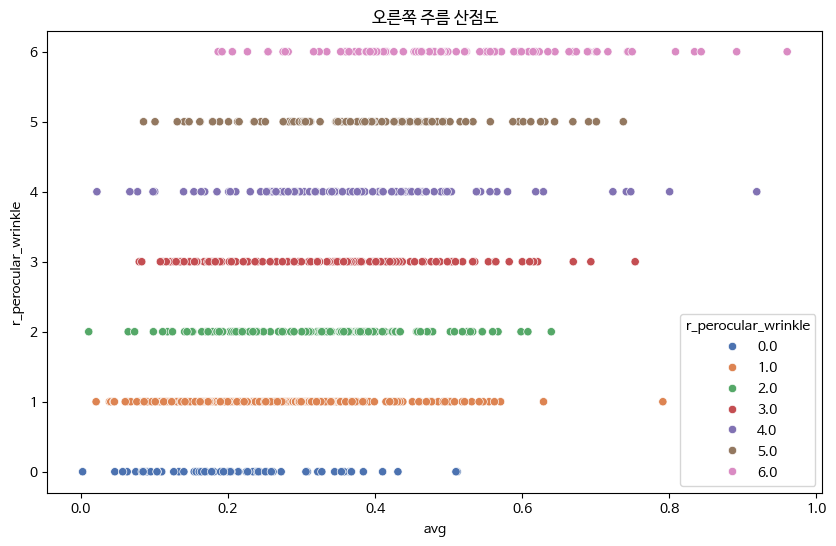

In [145]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = all_r, x='avg', y='r_perocular_wrinkle', hue='r_perocular_wrinkle', palette='deep')
plt.title('오른쪽 주름 산점도')
plt.show()

In [156]:
df0 = all_r[all_r.r_perocular_wrinkle == 0.0].describe()
df0

,ID,r_perocular_wrinkle,주름_오른쪽눈가_Ra,주름_오른쪽눈가_Rq,주름_오른쪽눈가_R3z,주름_오른쪽눈가_Rz=Rtm,avg
count,68.000000,68.0,68.000000,68.000000,68.000000,68.000000,68.000000
mean,429.705882,0.0,0.207068,0.198535,0.239243,0.227114,0.217990
std,312.865336,0.0,0.107189,0.102385,0.118678,0.113452,0.109988
min,3.000000,0.0,0.000000,0.000000,0.000000,0.009353,0.002338
25%,150.750000,0.0,0.130568,0.126614,0.151940,0.152497,0.138543
50%,373.000000,0.0,0.192531,0.182356,0.223629,0.209341,0.203726
75%,709.000000,0.0,0.267063,0.258234,0.305173,0.287880,0.280744
max,1061.000000,0.0,0.504806,0.477042,0.556348,0.557180,0.511696


In [157]:
df1 = all_r[all_r.r_perocular_wrinkle == 1.0].describe()
df1

,ID,r_perocular_wrinkle,주름_오른쪽눈가_Ra,주름_오른쪽눈가_Rq,주름_오른쪽눈가_R3z,주름_오른쪽눈가_Rz=Rtm,avg
count,322.000000,322.0,322.000000,322.000000,322.000000,322.000000,322.000000
mean,631.947205,1.0,0.260568,0.248770,0.295437,0.279115,0.270972
std,330.343237,0.0,0.115315,0.109108,0.126244,0.117003,0.116385
min,13.000000,1.0,0.022117,0.018957,0.025060,0.016543,0.020669
25%,301.500000,1.0,0.178198,0.170719,0.205999,0.196496,0.189684
50%,728.500000,1.0,0.260413,0.250098,0.295040,0.280515,0.273235
75%,909.250000,1.0,0.324205,0.308926,0.361672,0.352691,0.337390
max,1100.000000,1.0,0.767573,0.721618,0.900863,0.775650,0.791426


In [158]:
df2 = all_r[all_r.r_perocular_wrinkle == 2.0].describe()
df2

,ID,r_perocular_wrinkle,주름_오른쪽눈가_Ra,주름_오른쪽눈가_Rq,주름_오른쪽눈가_R3z,주름_오른쪽눈가_Rz=Rtm,avg
count,140.000000,140.0,140.000000,140.000000,140.000000,140.000000,140.000000
mean,423.478571,2.0,0.307485,0.293321,0.342580,0.322092,0.316370
std,317.506596,0.0,0.121876,0.115997,0.131116,0.125507,0.123062
min,1.000000,2.0,0.010888,0.007566,0.024085,0.000000,0.010635
25%,136.500000,2.0,0.218448,0.210265,0.244546,0.237673,0.220971
50%,322.000000,2.0,0.316230,0.300709,0.347644,0.328226,0.325599
75%,680.000000,2.0,0.373798,0.356885,0.418673,0.392371,0.387482
max,1093.000000,2.0,0.637366,0.601265,0.678249,0.641839,0.639680


In [159]:
df3 = all_r[all_r.r_perocular_wrinkle == 3.0].describe()
df3

,ID,r_perocular_wrinkle,주름_오른쪽눈가_Ra,주름_오른쪽눈가_Rq,주름_오른쪽눈가_R3z,주름_오른쪽눈가_Rz=Rtm,avg
count,140.000000,140.0,140.000000,140.000000,140.000000,140.000000,140.000000
mean,452.478571,3.0,0.322910,0.307067,0.359603,0.330603,0.330046
std,302.359462,0.0,0.142717,0.136591,0.153901,0.145079,0.144109
min,2.000000,3.0,0.071370,0.071242,0.082818,0.078023,0.079331
25%,178.500000,3.0,0.192588,0.185742,0.226339,0.195783,0.203365
50%,453.000000,3.0,0.332988,0.313492,0.361642,0.340569,0.337053
75%,706.500000,3.0,0.413637,0.396153,0.453851,0.430942,0.424951
max,1047.000000,3.0,0.723736,0.693813,0.829418,0.767994,0.753740


In [160]:
df4 = all_r[all_r.r_perocular_wrinkle == 4.0].describe()
df4

,ID,r_perocular_wrinkle,주름_오른쪽눈가_Ra,주름_오른쪽눈가_Rq,주름_오른쪽눈가_R3z,주름_오른쪽눈가_Rz=Rtm,avg
count,100.000000,100.0,100.000000,100.000000,100.000000,100.000000,100.000000
mean,548.040000,4.0,0.370631,0.352357,0.403181,0.373372,0.374885
std,328.853838,0.0,0.159082,0.150135,0.170536,0.155898,0.158275
min,10.000000,4.0,0.024357,0.016631,0.041320,0.004832,0.021785
25%,322.500000,4.0,0.269834,0.259468,0.295025,0.271778,0.270463
50%,472.000000,4.0,0.355913,0.344232,0.386954,0.359376,0.355718
75%,905.250000,4.0,0.459573,0.436340,0.502365,0.454950,0.458743
max,1079.000000,4.0,0.911617,0.862864,1.000000,0.902083,0.919141


In [161]:
df5 = all_r[all_r.r_perocular_wrinkle == 5.0].describe()
df5

,ID,r_perocular_wrinkle,주름_오른쪽눈가_Ra,주름_오른쪽눈가_Rq,주름_오른쪽눈가_R3z,주름_오른쪽눈가_Rz=Rtm,avg
count,97.000000,97.0,97.000000,97.000000,97.000000,97.000000,97.000000
mean,671.917526,5.0,0.385809,0.365768,0.409595,0.383357,0.386132
std,270.036135,0.0,0.150317,0.141887,0.154821,0.144820,0.147001
min,49.000000,5.0,0.086597,0.077569,0.099176,0.077263,0.085151
25%,440.000000,5.0,0.285309,0.269033,0.306890,0.294385,0.288046
50%,675.000000,5.0,0.386310,0.363820,0.419449,0.387420,0.386218
75%,943.000000,5.0,0.474608,0.448715,0.507351,0.471856,0.470832
max,1082.000000,5.0,0.740295,0.708705,0.782215,0.726497,0.737605


In [162]:
df6 = all_r[all_r.r_perocular_wrinkle == 6.0].describe()
df6

,ID,r_perocular_wrinkle,주름_오른쪽눈가_Ra,주름_오른쪽눈가_Rq,주름_오른쪽눈가_R3z,주름_오른쪽눈가_Rz=Rtm,avg
count,98.000000,98.0,98.000000,98.000000,98.000000,98.000000,98.000000
mean,598.775510,6.0,0.495121,0.472475,0.514760,0.490177,0.493133
std,167.940069,0.0,0.165672,0.160532,0.159449,0.161894,0.160606
min,237.000000,6.0,0.183486,0.173964,0.207438,0.181749,0.186659
25%,499.500000,6.0,0.379746,0.363695,0.414726,0.383370,0.387531
50%,570.500000,6.0,0.479386,0.454672,0.497807,0.475379,0.479836
75%,683.500000,6.0,0.595500,0.563861,0.614966,0.598761,0.597389
max,1046.000000,6.0,1.000000,1.000000,0.936438,1.000000,0.960483


In [164]:
pd.concat([df0.avg, df1.avg, df2.avg, df3.avg, df4.avg, df5.avg, df6.avg], axis = 1)

,avg,avg,avg,avg,avg,avg,avg
count,68.000000,322.000000,140.000000,140.000000,100.000000,97.000000,98.000000
mean,0.217990,0.270972,0.316370,0.330046,0.374885,0.386132,0.493133
std,0.109988,0.116385,0.123062,0.144109,0.158275,0.147001,0.160606
min,0.002338,0.020669,0.010635,0.079331,0.021785,0.085151,0.186659
25%,0.138543,0.189684,0.220971,0.203365,0.270463,0.288046,0.387531
50%,0.203726,0.273235,0.325599,0.337053,0.355718,0.386218,0.479836
75%,0.280744,0.337390,0.387482,0.424951,0.458743,0.470832,0.597389
max,0.511696,0.791426,0.639680,0.753740,0.919141,0.737605,0.960483
